# **Project Name**    -  Airline Passenger Referral Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

This project analyzes airline passenger reviews to predict whether a passenger would recommend the airline to others. The dataset contains information about various aspects of the travel experience, such as airline, cabin class, seat comfort, and overall satisfaction.

The project uses machine learning algorithms to build a predictive model. This involves data cleaning, exploratory data analysis, feature engineering, model selection, and evaluation. The goal is to identify key factors that influence passenger recommendations and develop a model that can accurately predict future recommendations.

The project also includes data visualization to gain insights into the relationships between different variables and their impact on passenger satisfaction. The findings can help airlines understand customer preferences and identify areas for improvement to enhance the travel experience and increase positive recommendations.

# **GitHub Link** - [LINK](https://github.com/datasciritwik/airline-project.git)

Provide your [ GitHub Link ](https://github.com/datasciritwik/airline-project.git
)here.

# **Problem Statement**


The problem statement for this project is to develop a predictive model that can accurately determine whether an airline passenger will recommend the airline to others based on their travel experience and feedback. This involves:

Identifying key factors that influence passenger recommendations.
Analyzing the relationship between different aspects of the travel experience and overall satisfaction.
Building a machine learning model that can effectively predict recommendations based on passenger feedback and other relevant data.
Providing actionable insights to airlines to improve customer satisfaction and increase positive recommendations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations and handling arrays
import numpy as np

# Importing matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing seaborn for enhanced data visualization
import seaborn as sns

# Importing string for string operations
import string

# Importing re for regular expression operations
import re

# Importing stopwords from NLTK for text preprocessing
from nltk.corpus import stopwords

# Importing word_tokenize from NLTK for tokenizing text into words
from nltk.tokenize import word_tokenize

# Importing WordNetLemmatizer from NLTK for lemmatizing words
from nltk.stem import WordNetLemmatizer

# Importing TfidfVectorizer for converting text to TF-IDF feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Importing functions for model evaluation and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc)

# Importing GridSearchCV for hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for hyperparameter tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV

# Importing RepeatedStratifiedKFold for cross-validation
from sklearn.model_selection import RepeatedStratifiedKFold

# Importing LogisticRegression for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Importing RandomForestClassifier for building random forest models
from sklearn.ensemble import RandomForestClassifier

# Importing XGBClassifier for implementing the XGBoost algorithm
from xgboost import XGBClassifier


# Importing statistical tests from scipy
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Installing SHAP library for model interpretation (quiet mode)
!pip install shap -qq

# Importing SHAP for interpreting machine learning models
import shap

# Importing graphviz for visualizing decision trees and other graphs
import graphviz

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 18.1 MB/s eta 0:00:00


### Cloning Repository

In [ ]:
!git clone https://github.com/datasciritwik/airline-project.git

Cloning into 'airline-project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 23.10 MiB | 12.93 MiB/s, done.


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_excel('/content/airline-project/data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head().style.background_gradient(cmap='Set2')

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 131895
Number of Columns: 17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

70711

### Droping Duplicate Values

In [ ]:
df.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
for col in df.columns:
  print(f'{col}: {df[col].isnull().sum()} | {round(df[col].isnull().sum()/131895, 2)*100}% missing values', end='\n\n')

airline: 1 | 0.0% missing values

overall: 1783 | 1.0% missing values

author: 1 | 0.0% missing values

review_date: 1 | 0.0% missing values

customer_review: 1 | 0.0% missing values

aircraft: 42696 | 32.0% missing values

traveller_type: 23644 | 18.0% missing values

cabin: 2479 | 2.0% missing values

route: 23671 | 18.0% missing values

date_flown: 23750 | 18.0% missing values

seat_comfort: 4973 | 4.0% missing values

cabin_service: 4944 | 4.0% missing values

food_bev: 12843 | 10.0% missing values

entertainment: 20954 | 16.0% missing values

ground_service: 24015 | 18.0% missing values

value_for_money: 1857 | 1.0% missing values

recommended: 1423 | 1.0% missing values



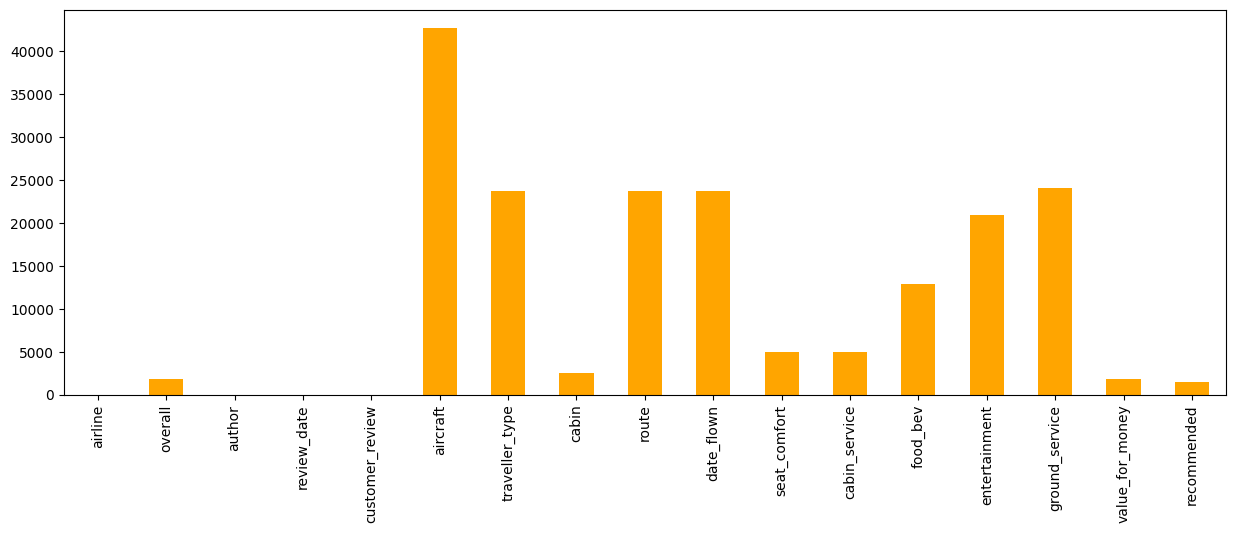

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
df.isna().sum().plot(kind='bar', color='orange')
plt.show()

### What did you know about your dataset?

- The dataset have Number of Rows: 131895 and Number of Columns: 17.
- In total their are 70711 duplicated values.
- All the columns have almost few missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(exclude='object').style.background_gradient(cmap='Set2')

In [ ]:
df.describe(include='object').T.style.background_gradient(cmap='Set2', text_color_threshold=0.5)

### Variables Description

**Feature descriptions briefly as follows:**

**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**review date:** Date of the Review

**customer review:**Review of the customers in free text format

**aircraft:** Type of the aircraft

**traveller type:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seat comfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5

**entertainment:** Rated between 1-5

**ground service:** Rated between 1-5

**value for money:** Rated between 1-5

**recommended:** Binary, target variable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f'{col}: {len(df[col].unique())}', end='\n\n')

airline: 82

overall: 11

author: 44070

review_date: 3016

customer_review: 61173

aircraft: 2089

traveller_type: 5

cabin: 5

route: 24550

date_flown: 64

seat_comfort: 6

cabin_service: 6

food_bev: 6

entertainment: 6

ground_service: 6

value_for_money: 6

recommended: 3



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Which airline having gets highest recommendation: Top 10
df[df['recommended'] == 'yes'].groupby('airline').count()['recommended'].sort_values(ascending=False).head(10)

airline
China Southern Airlines    1454
British Airways            1141
Qatar Airways              1101
Lufthansa                   981
Emirates                    944
Qantas Airways              872
Cathay Pacific Airways      803
Singapore Airlines          795
Turkish Airlines            726
Ryanair                     692
Name: recommended, dtype: int64

In [ ]:
# Which airline gets lowest recommendation: Lowest 10
df[df['recommended'] == 'no'].groupby('airline').count()['recommended'].sort_values(ascending=False).head(10)

airline
Spirit Airlines      2302
American Airlines    2204
United Airlines      2134
British Airways      1503
Frontier Airlines    1375
Delta Air Lines       894
Ryanair               835
Air Canada rouge      828
Etihad Airways        814
Emirates              772
Name: recommended, dtype: int64

In [ ]:
# Top aircraft for traveller types
for travel_type in list(df['traveller_type'].unique()[1:]):
  print(f'{travel_type}:')
  print(df[df['traveller_type'] == travel_type].groupby('traveller_type')['aircraft'].value_counts().sort_values(ascending=False).head())
  print('-'*50)

Business:
traveller_type  aircraft      
Business        A320              460
                Boeing 777        265
                A330              256
                A380              240
                Boeing 737-800    214
Name: count, dtype: int64
--------------------------------------------------
Family Leisure:
traveller_type  aircraft      
Family Leisure  A320              348
                A380              190
                Boeing 737-800    160
                Boeing 787        144
                Boeing 777        143
Name: count, dtype: int64
--------------------------------------------------
Solo Leisure:
traveller_type  aircraft      
Solo Leisure    A320              814
                Boeing 737-800    416
                Boeing 777        378
                A380              364
                A330              346
Name: count, dtype: int64
--------------------------------------------------
Couple Leisure:
traveller_type  aircraft      
Couple Leisure  A32

In [ ]:
# Which Traveller type by cabin gives more recommendation
for travel_type in list(df['traveller_type'].unique()[1:]):
  print(f'{travel_type}:')
  print(df[(df['traveller_type'] == travel_type) & (df['recommended'] == 'yes')].groupby('traveller_type')['cabin'].value_counts().sort_values(ascending=False).head())
  print('-'*50)

Business:
traveller_type  cabin          
Business        Economy Class      1373
                Business Class     1062
                Premium Economy     163
                First Class         128
Name: count, dtype: int64
--------------------------------------------------
Family Leisure:
traveller_type  cabin          
Family Leisure  Economy Class      2237
                Business Class      377
                First Class          74
                Premium Economy      70
Name: count, dtype: int64
--------------------------------------------------
Solo Leisure:
traveller_type  cabin          
Solo Leisure    Economy Class      4967
                Business Class     1358
                Premium Economy     294
                First Class         242
Name: count, dtype: int64
--------------------------------------------------
Couple Leisure:
traveller_type  cabin          
Couple Leisure  Economy Class      2497
                Business Class      861
                Premium E

In [ ]:
# Percentage of positive recommedation getting each aircraft
recomm = {}
for airct in list(df['aircraft'].unique()):
  try:
    recomm[airct] = round(len(df[(df['aircraft'] == airct) & (df['recommended'] == 'yes')])/len(df[df['aircraft'] == airct])*100, 2)
  except:
    pass
## Printing Top 10
print("Top 10", end='\n\n')
t10 = sorted(recomm.items(), key=lambda x: x[1], reverse=True)[:10]
for i in t10:
  print(f'- {i[0]}: {i[1]}%')

Top 10

- Boeing 737-8M: 100.0%
- A 330: 100.0%
- A330/B777: 100.0%
- A330-200/300: 100.0%
- A321 / A333: 100.0%
- A330 /A321: 100.0%
- A321-232: 100.0%
- B738 / B777: 100.0%
- Boeing 777-300er / A330-300: 100.0%
- A330-200 / A321-200: 100.0%


### What all manipulations have you done and insights you found?

- China Southern Airlines is the highest recommended and sprint airlines is the least.
- Solo and couple leisure are the most of the traveller types but surprisingly in all types of traveller types A320 is at the top.
- Economy class is at top preference for all types of traveller types
- Boeing aircrafts are getting 100% recommendation and they are in top 10.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Frequency of an airlines

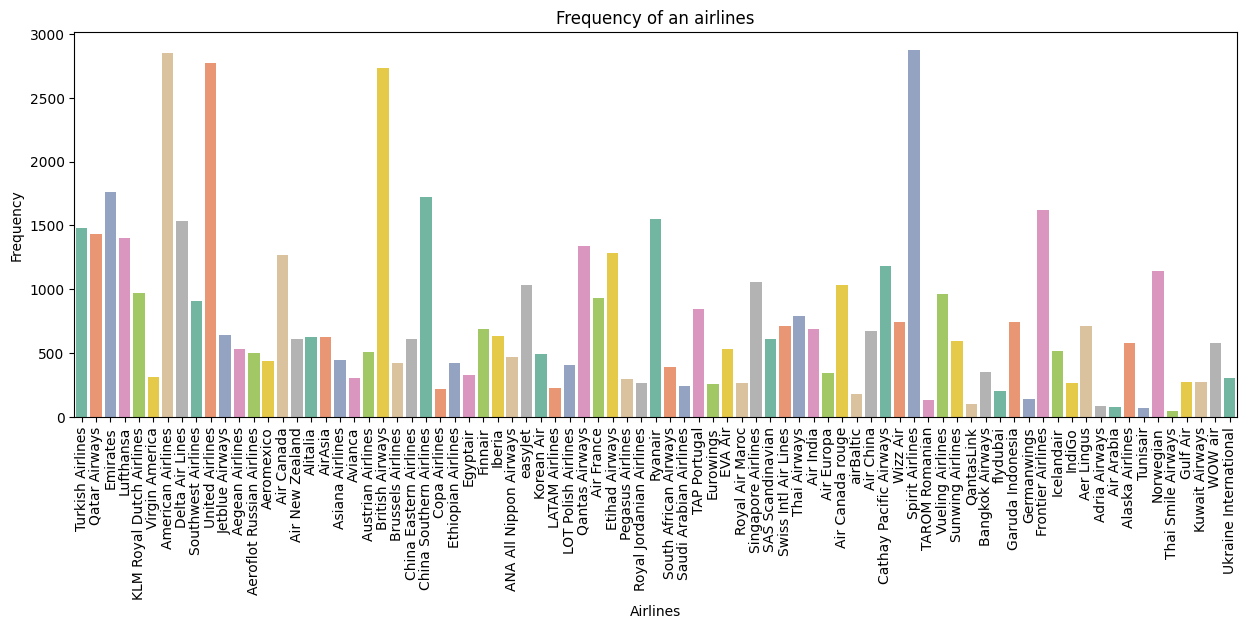

In [ ]:
# Chart - 1 visualization code
## Frequency of an airlines
plt.figure(figsize=(15,5))
sns.countplot(x='airline', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Airlines')
plt.ylabel('Frequency')
plt.title('Frequency of an airlines')
plt.show()

##### 1. Why did you pick the specific chart?

Frequency for all airlines in a dataset.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
df['airline'].value_counts().head()

airline
Spirit Airlines      2871
American Airlines    2846
United Airlines      2774
British Airways      2731
Emirates             1763
Name: count, dtype: int64

Sprint airlines are at the top and The insight found from the chart is that Southwest Airlines has the highest frequency in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing which airlines are most frequent in the dataset can help you focus your analysis on those airlines and tailor your strategies accordingly. This could lead to identifying areas where those airlines excel or need improvement, ultimately contributing to positive business decisions.

#### Chart - 2. Frequency of an traveller type by recommendation

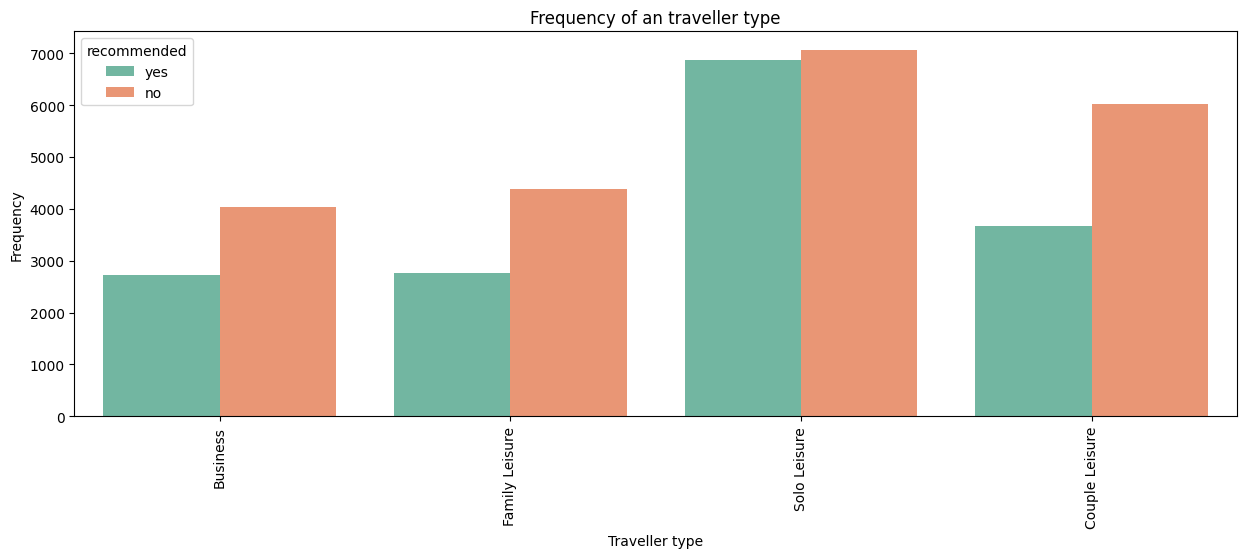

In [ ]:
# Chart - 2 visualization code
## Frequency of an traveller type
plt.figure(figsize=(15,5))
sns.countplot(x='traveller_type', data=df, palette='Set2', hue='recommended')
plt.xticks(rotation=90)
plt.xlabel('Traveller type')
plt.ylabel('Frequency')
plt.title('Frequency of an traveller type')
plt.show()

##### 1. Why did you pick the specific chart?

It's more easy to understand frequency with different class labels.

##### 2. What is/are the insight(s) found from the chart?

- Solo Leisure travelers are the most frequent travelers, followed by Couple Leisure.
- Solo Leisure travelers have 50/50 rate of recommendations.
- Family and couple Leisure travelers have a relatively high number of "no" recommendations compared to other traveler types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- **Targeted marketing:** Knowing which traveler types are most likely to recommend an airline allows for targeted marketing campaigns. For example, airlines could offer special promotions or loyalty programs to Business travelers to further increase their satisfaction and encourage referrals.
- **Service improvement:** The insights highlight potential areas for service improvement. For example, airlines could investigate why Family Leisure travelers have a higher rate of negative recommendations. They might consider offering more family-friendly amenities or services to improve their experience.
Insights that lead to negative growth:

While no insights directly indicate negative growth, neglecting the needs of specific traveler types could lead to negative consequences. For example, if airlines focus solely on Business travelers and ignore the concerns of Family Leisure travelers, they risk losing a significant customer segment.
By understanding the needs and preferences of different traveler types, airlines can make informed decisions to enhance customer satisfaction, improve services, and drive positive business growth.

#### Chart - 3. Frequency of an cabin by recommendation

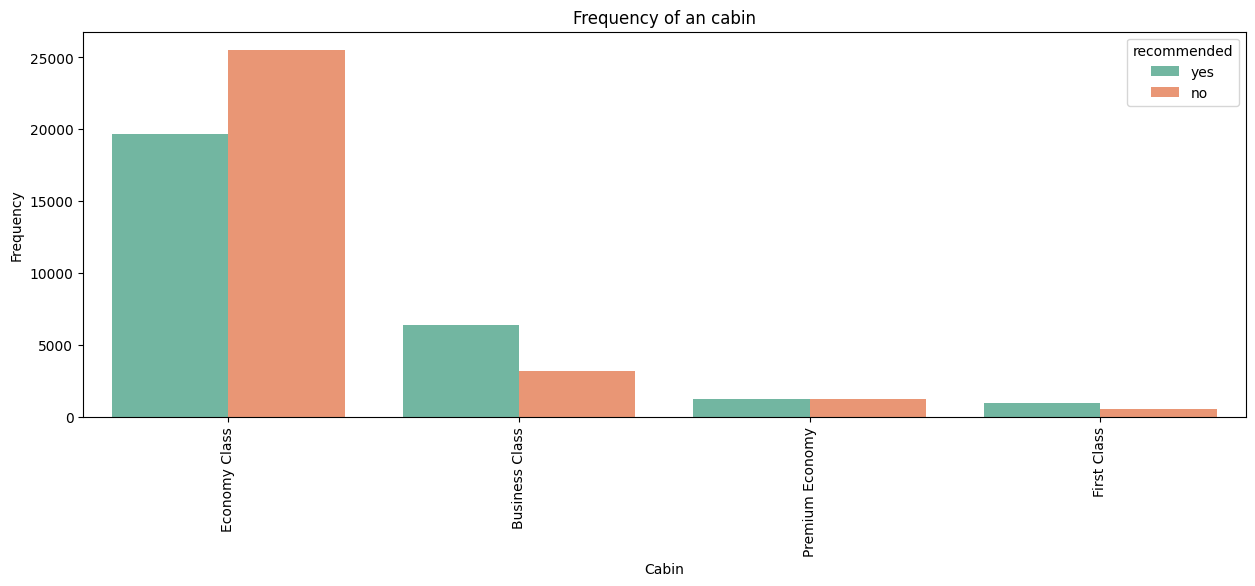

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x='cabin', data=df, palette='Set2', hue='recommended')
plt.xticks(rotation=90)
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.title('Frequency of an cabin')
plt.show()

##### 1. Why did you pick the specific chart?

It's more easy to understand frequency with different class labels.

##### 2. What is/are the insight(s) found from the chart?

- Economy class is the most frequent cabin class, followed by Business class.
- Premium Economy and First class have relatively lower frequencies.
- Economy class has a higher number of "no" recommendations compared to other cabin classes.
- Business class has the highest rate of "yes" recommendations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

- **Targeted Improvements:** Airlines could use this information to focus on improving the economy class experience, as it has the highest number of "no" recommendations. This could involve enhancing seat comfort, in-flight entertainment, or meal options.
- **Promote Premium Options:** The data suggests that passengers in Business class have higher satisfaction. Airlines could leverage this by promoting the benefits of upgrading to Business or First class, potentially increasing revenue.

**Insights that Might Lead to Negative Growth:**

- **Ignoring Economy Class:** If airlines solely focus on premium cabins and neglect the economy class, they risk alienating a large portion of their customer base. This could lead to negative word-of-mouth and decreased customer loyalty.

By analyzing the relationship between cabin class and recommendations, airlines can make informed decisions to improve customer experience and potentially increase revenue.

#### Chart - 4. Top 10 aircraft for traveller types

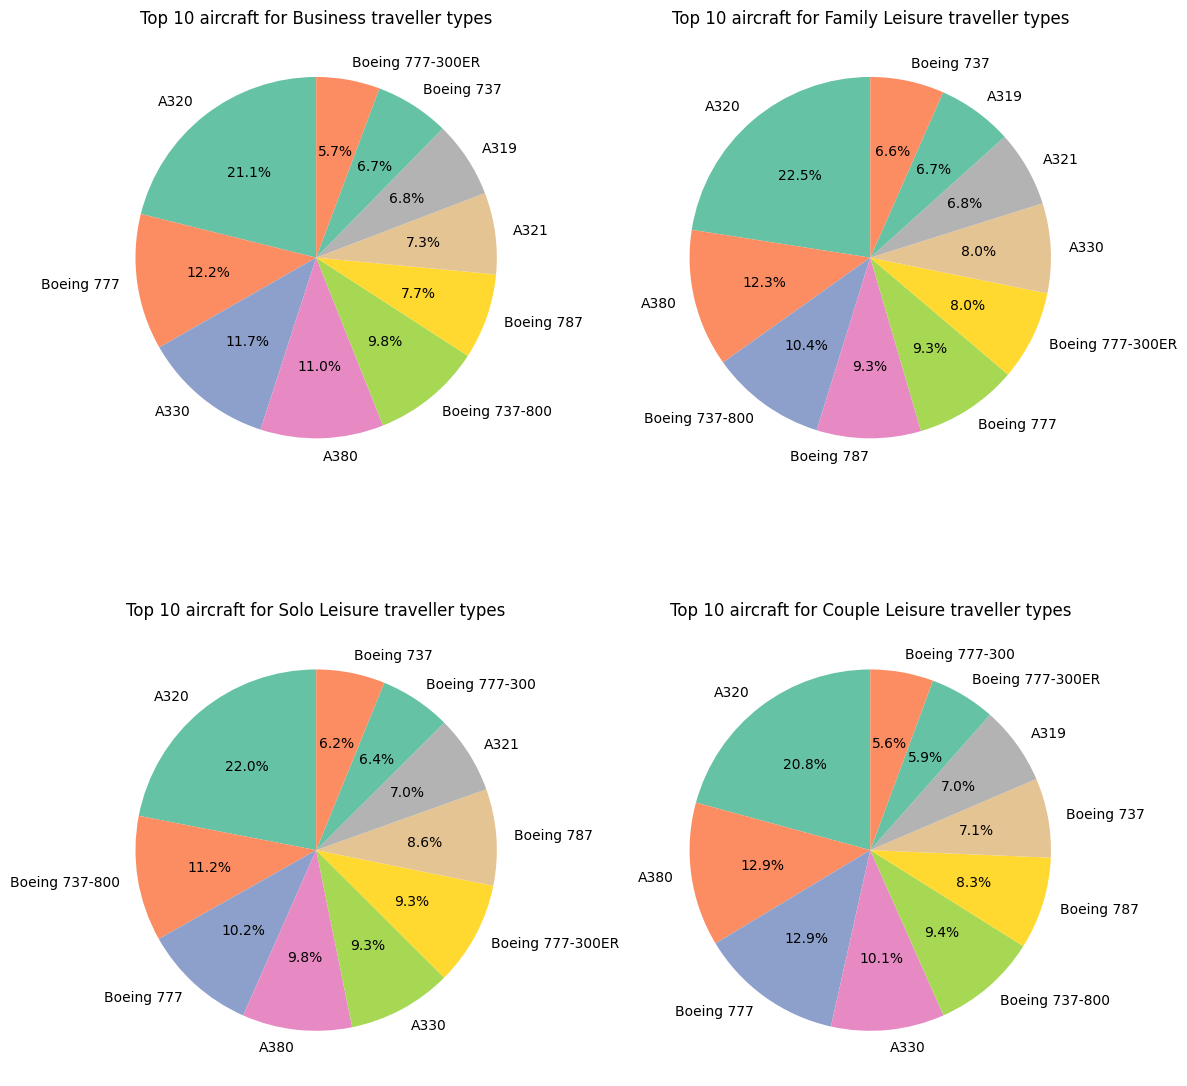

In [ ]:
# Chart - 4 visualization code

# Set the color palette to Set2
sns.set_palette("Set2")

# Set up the figure size for all subplots
plt.figure(figsize=(12, 12))

# Define a list of traveler types for iteration
traveller_types = ['Business', 'Family Leisure', 'Solo Leisure', 'Couple Leisure']

# Loop through each traveler type to create subplots
for i, traveller_type in enumerate(traveller_types, start=1):
    plt.subplot(2, 2, i)

    # Filter the DataFrame and get the top 5 aircraft
    top_aircraft = df[df['traveller_type'] == traveller_type]['aircraft'].value_counts().head(10)

    # Plot the pie chart with the Set2 palette
    top_aircraft.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", n_colors=len(top_aircraft)))

    # Set the title for each subplot
    plt.title(f'Top 10 aircraft for {traveller_type} traveller types')
    plt.ylabel('')  # Hide the y-label for better aesthetics

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This's the great way to understand percentage to total.

##### 2. What is/are the insight(s) found from the chart?

- **Most Frequent Aircraft:** The Airbus A320 family (A319, A320, A321) are the most frequently used aircraft across all traveler types.

- **Business Travelers:** For Business travelers, the Boeing 737 is the second most frequent aircraft, suggesting its popularity for business routes.

- **Leisure Travelers:** The Boeing 777 is more common among Family Leisure travelers, likely due to its larger capacity and suitability for long-haul flights.

- **Variations:** There are some variations in aircraft preferences among different leisure traveler types, indicating potential differences in route choices or airline preferences.

- **Limited Variety:** The top 10 aircraft for each traveler type mostly consist of Airbus A320 and Boeing 737 families, suggesting a limited variety in aircraft used for these types of travel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- **Targeted Aircraft Acquisition:** Airlines can make informed decisions about expanding or modernizing their fleet based on the preferred aircraft for each traveler type. This ensures efficient resource allocation and potentially reduces costs.
- **Route Optimization:** Understanding aircraft preferences can help airlines optimize routes and schedules. For example, deploying larger aircraft like the Boeing 777 on routes popular with Family Leisure travelers could increase capacity and revenue.
- **Tailored Amenities:** If certain aircraft are favored by specific traveler types, airlines could tailor in-flight amenities and services to cater to their preferences, enhancing customer satisfaction.

Insights that Might Lead to Negative Growth:

- **Over-Reliance on Specific Models:** If airlines solely focus on the most frequent aircraft types, they might miss opportunities to cater to niche markets or diversify their offerings. This could lead to a loss of potential customers who prefer different aircraft.
- **Ignoring Emerging Trends:** Traveler preferences for aircraft might evolve. Airlines should continuously monitor trends and adapt their strategies to avoid potential negative growth due to outdated fleet composition.
- **Neglecting smaller aircraft:** If airlines only focus on acquiring larger aircraft, they might not be able to service less popular routes which may be profitable nonetheless.

#### Chart - 5. Frequency of an Seat Comfort

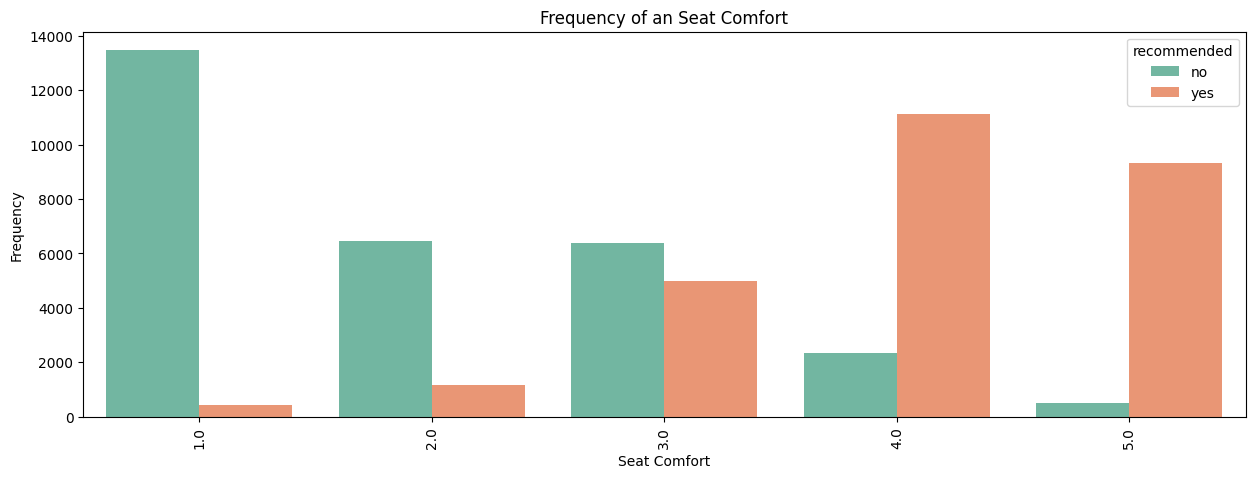

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x='seat_comfort', data=df, palette='Set2', hue='recommended')
plt.xticks(rotation=90)
plt.xlabel('Seat Comfort')
plt.ylabel('Frequency')
plt.title('Frequency of an Seat Comfort')
plt.show()

##### 1. Why did you pick the specific chart?

It's more easy to understand frequency with different class labels.

##### 2. What is/are the insight(s) found from the chart?

Here are some insights from the chart:

- **Most Common Rating:** A seat comfort rating of 3 is the most frequent, followed by ratings of 4 and 2.
- **Relationship with Recommendations:** Higher seat comfort ratings (4 and 5) have a significantly higher proportion of "yes" recommendations compared to lower ratings (1 and 2).
- **Impact of Low Ratings:** Seat comfort ratings of 1 and 2 have a substantial number of "no" recommendations, indicating that seat comfort strongly influences passenger satisfaction and recommendations.
- **Potential Improvement Areas:** The chart highlights the importance of seat comfort as a key factor in passenger experience. Airlines might need to focus on improving seat comfort, especially for those rated 1 or 2, to increase positive recommendations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- **Prioritize Seat Comfort:** Airlines can prioritize investments in seat comfort upgrades, particularly for aircraft or classes with lower ratings. This could involve using more comfortable materials, redesigning seats, or offering more legroom.
- **Targeted Improvements:** Focus on specific areas where seat comfort is lacking, such as particular aircraft types, cabin classes, or routes. This targeted approach can optimize resource allocation and maximize the impact of improvements.
- **Competitive Advantage:** Emphasize seat comfort in marketing and advertising to attract customers who value this aspect of travel. This could differentiate the airline from competitors and potentially increase bookings.

Insights that Might Lead to Negative Growth:

- **Ignoring Low Ratings:** If airlines fail to address low seat comfort ratings, it could lead to negative word-of-mouth, reduced customer satisfaction, and decreased recommendations. This could ultimately impact future bookings and revenue.
- **Uneven Distribution of Improvements:** If seat comfort improvements are not evenly distributed across the fleet or cabin classes, it could create disparities in passenger experience and lead to dissatisfaction among certain customer segments.

#### Chart - 6. Frequency of an Entertainment

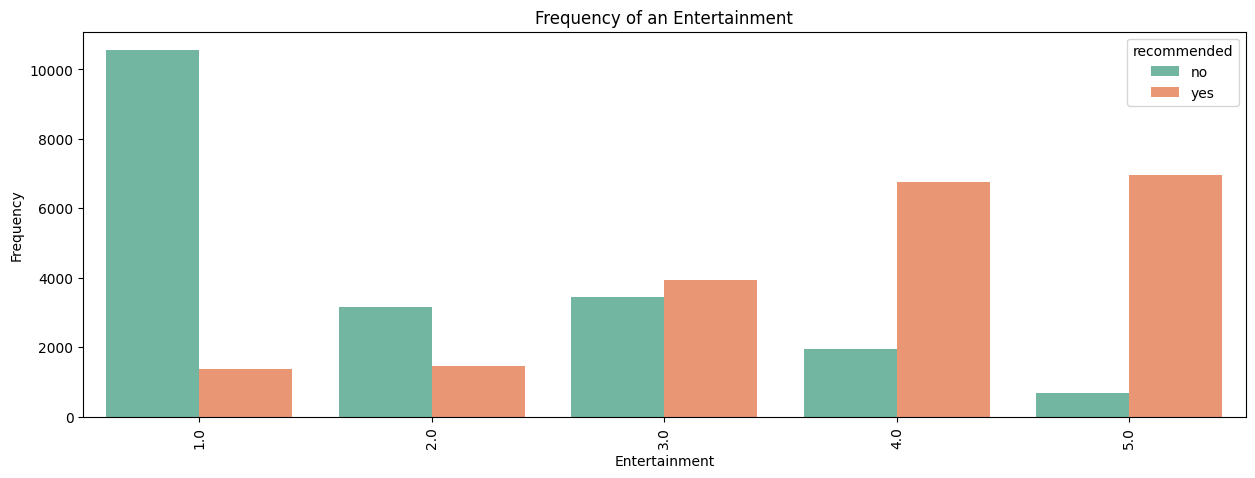

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x='entertainment', data=df, palette='Set2', hue='recommended')
plt.xticks(rotation=90)
plt.xlabel('Entertainment')
plt.ylabel('Frequency')
plt.title('Frequency of an Entertainment')
plt.show()

##### 1. Why did you pick the specific chart?

It's more easy to understand frequency with different class labels.

##### 2. What is/are the insight(s) found from the chart?

- **Rating Distribution:** Entertainment ratings of 3 and 4 are the most frequent, suggesting a generally positive perception of in-flight entertainment.
- **Recommendation Correlation:** Higher entertainment ratings (4 and 5) show a clear correlation with a higher proportion of "yes" recommendations. Lower ratings (1 and 2) have a noticeable increase in "no" recommendations.
- **Entertainment Influence:** This chart indicates that in-flight entertainment significantly influences passenger satisfaction and their likelihood to recommend an airline.
- **Areas for Enhancement:** While ratings are generally positive, there's still room for improvement, especially for entertainment options rated 1 or 2. Airlines could explore ways to enhance their offerings to increase positive recommendations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- **Entertainment Investment:** Prioritize investments in upgrading in-flight entertainment systems, especially for aircraft or classes with lower ratings. This could involve offering a wider selection of movies, TV shows, music, games, and Wi-Fi connectivity.
- **Personalized Entertainment:** Consider personalized entertainment options based on passenger preferences and demographics. This could involve using data analytics to recommend content or offering customizable entertainment packages.
- **Partnerships and Content:** Partner with content providers to offer exclusive entertainment options or create unique experiences for passengers. This could enhance the perceived value of the in-flight entertainment and attract more customers.

Insights that Might Lead to Negative Growth:

- **Ignoring Entertainment Trends:** Neglecting to update entertainment options or failing to keep up with technological advancements could lead to outdated systems and dissatisfied passengers.
- **Limited Options:** Offering a limited selection of entertainment choices or neglecting specific passenger preferences could result in negative feedback and lower recommendation rates. This is especially critical for long-haul flights where entertainment plays a more significant role in the overall experience.

#### Chart - 7. Top 10 Aircraft for Entertainment Level

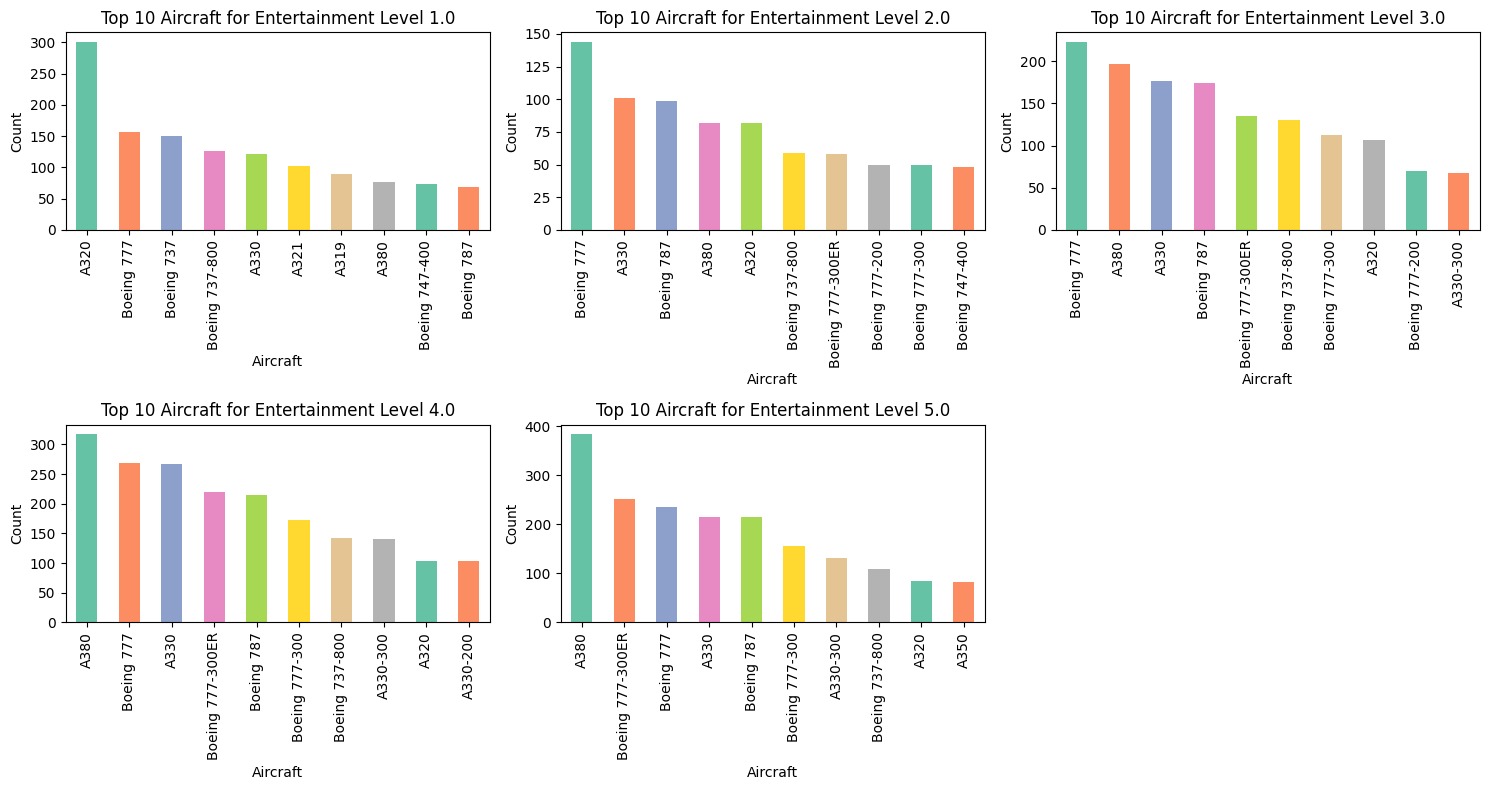

In [ ]:

# Set the color palette to Set2
sns.set_palette("Set2")

# Set up the figure size for all subplots
plt.figure(figsize=(15, 8))

# Define the entertainment levels
entertainment_levels = [1.0, 2.0, 3.0, 4.0, 5.0]

# Loop through each entertainment level to create subplots
for i, level in enumerate(entertainment_levels, start=1):
    plt.subplot(2, 3, i)

    # Filter the DataFrame and get the top 10 aircraft for the current entertainment level
    top_aircraft = df[df['entertainment'] == level]['aircraft'].value_counts().head(10)

    # Plot the bar chart with the Set2 palette
    top_aircraft.plot(kind='bar', color=sns.color_palette("Set2", n_colors=len(top_aircraft)))

    # Set the title for each subplot
    plt.title(f'Top 10 Aircraft for Entertainment Level {level}')
    plt.xlabel('Aircraft')
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It's more easy to understand frequency.

##### 2. What is/are the insight(s) found from the chart?

- **Dominant Aircraft:** The Airbus A320 and Boeing 737 families consistently appear among the top 10 aircraft across different entertainment levels. This suggests their widespread use and potential influence on overall entertainment ratings.
- **Entertainment Variation:** Certain aircraft types, like the Boeing 777 and Airbus A330, seem to have a higher prevalence at higher entertainment levels (4 and 5). This might indicate better entertainment systems or a greater focus on entertainment on these aircraft.
- **Data Sparsity:** Some entertainment levels (particularly 1 and 2) have limited data for certain aircraft, making it difficult to draw strong conclusions about their entertainment quality.
- **Potential Relationship:** While not conclusive, there might be a relationship between specific aircraft types and entertainment ratings. Further analysis could explore this potential connection and identify factors influencing entertainment satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

- **Targeted Entertainment Upgrades:** If certain aircraft types consistently receive lower entertainment ratings, airlines could prioritize upgrading their entertainment systems on those specific models. This ensures resources are used effectively to address areas with the most significant need for improvement.
- **Aircraft-Specific Entertainment:** Tailor entertainment options based on the aircraft type. For example, if passengers on Boeing 777s generally rate entertainment higher, airlines could consider offering premium entertainment packages or exclusive content on these aircraft.
- **Data-Driven Decisions:** Use the insights to make informed decisions about entertainment investments. By understanding which aircraft types contribute to positive or negative entertainment experiences, airlines can allocate resources strategically.

Insights that Might Lead to Negative Growth

- **Inconsistent Entertainment:** If entertainment quality varies significantly across different aircraft types, it could lead to inconsistent passenger experiences and potentially lower overall satisfaction. This might negatively impact brand perception and customer loyalty.
- **Misinterpretation of Data:** Drawing conclusions based on limited data for certain aircraft types or entertainment levels could lead to inaccurate assumptions and ineffective investment decisions.
- **Ignoring Other Factors:** Focusing solely on aircraft type might overlook other crucial factors influencing entertainment ratings, such as seat comfort, cabin service, and the overall travel experience.

#### Chart - 8. Top 10 Aircraft for Seat Comfort Level

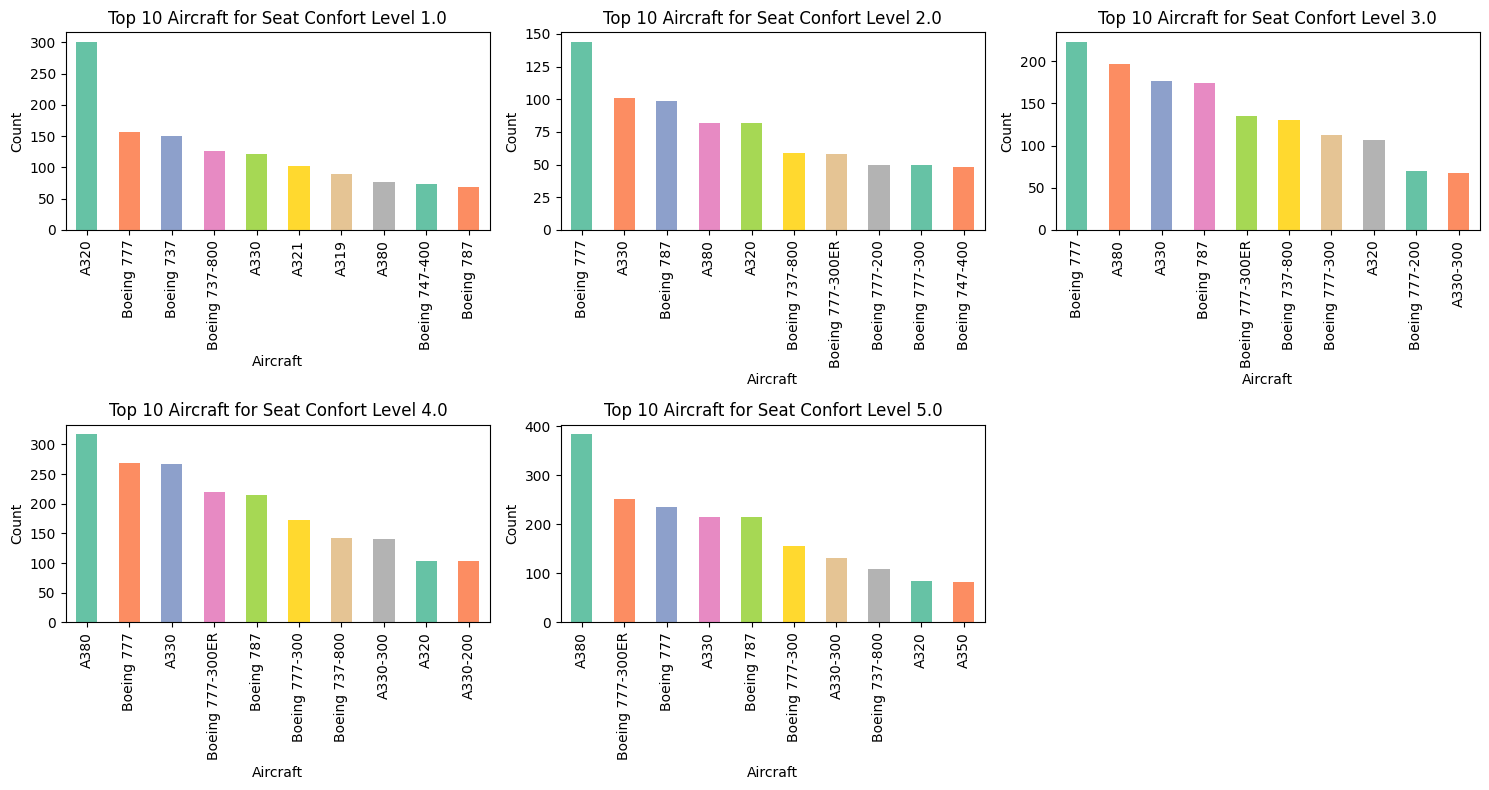

In [ ]:
# Chart - 8 visualization code

# Set the color palette to Set2
sns.set_palette("Set2")

# Set up the figure size for all subplots
plt.figure(figsize=(15, 8))

# Define the entertainment levels
comfort_levels = [1.0, 2.0, 3.0, 4.0, 5.0]

# Loop through each entertainment level to create subplots
for i, level in enumerate(comfort_levels, start=1):
    plt.subplot(2, 3, i)

    # Filter the DataFrame and get the top 10 aircraft for the current entertainment level
    top_aircraft = df[df['entertainment'] == level]['aircraft'].value_counts().head(10)

    # Plot the bar chart with the Set2 palette
    top_aircraft.plot(kind='bar', color=sns.color_palette("Set2", n_colors=len(top_aircraft)))

    # Set the title for each subplot
    plt.title(f'Top 10 Aircraft for Seat Confort Level {level}')
    plt.xlabel('Aircraft')
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It's more easy to understand frequency.

##### 2. What is/are the insight(s) found from the chart?

- **Common Aircraft:** Similar to Chart-7, the Airbus A320 and Boeing 737 families are frequent across various seat comfort levels, highlighting their widespread use.
- **Comfort Variation:** Some aircraft, like the Boeing 777 and Airbus A330, appear more frequently at higher comfort levels (4 and 5), suggesting potentially better seat comfort on these models.
- **Limited Data:** Certain comfort levels, especially 1 and 2, have limited data for some aircraft, making it difficult to draw firm conclusions about their seat comfort.
- **Potential Correlation:** While not definitive, there might be a correlation between specific aircraft types and seat comfort ratings. Further investigation could uncover factors contributing to seat comfort variations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

- **Prioritize Seat Upgrades:** If particular aircraft types consistently show lower seat comfort ratings, airlines could prioritize upgrading seats on those models. This ensures efficient allocation of resources to address areas needing the most improvement.
- **Tailored Seat Design:** Consider customizing seat design and features based on the aircraft type. For instance, if passengers on Boeing 777s generally rate seat comfort higher, airlines could explore incorporating similar seat designs or features on other aircraft.
- **Data-Driven Decisions:** Utilize the insights to make informed decisions about seat-related investments. Understanding which aircraft types contribute to positive or negative seat comfort perceptions allows for strategic resource allocation.

Insights that Might Lead to Negative Growth

- **Uneven Comfort:** If seat comfort differs significantly across aircraft types, it could lead to inconsistent passenger experiences and potentially lower overall satisfaction. This might negatively affect brand perception and customer loyalty.
- **Misinterpretation of Data:** Drawing conclusions from limited data for specific aircraft or comfort levels could result in inaccurate assumptions and ineffective investment decisions.
- **Ignoring Other Factors:** Focusing solely on aircraft type might overlook other important factors influencing seat comfort, such as seat pitch, width, cushioning, and cabin configuration.

#### Chart - 9. Top 10 aircraft for cabin

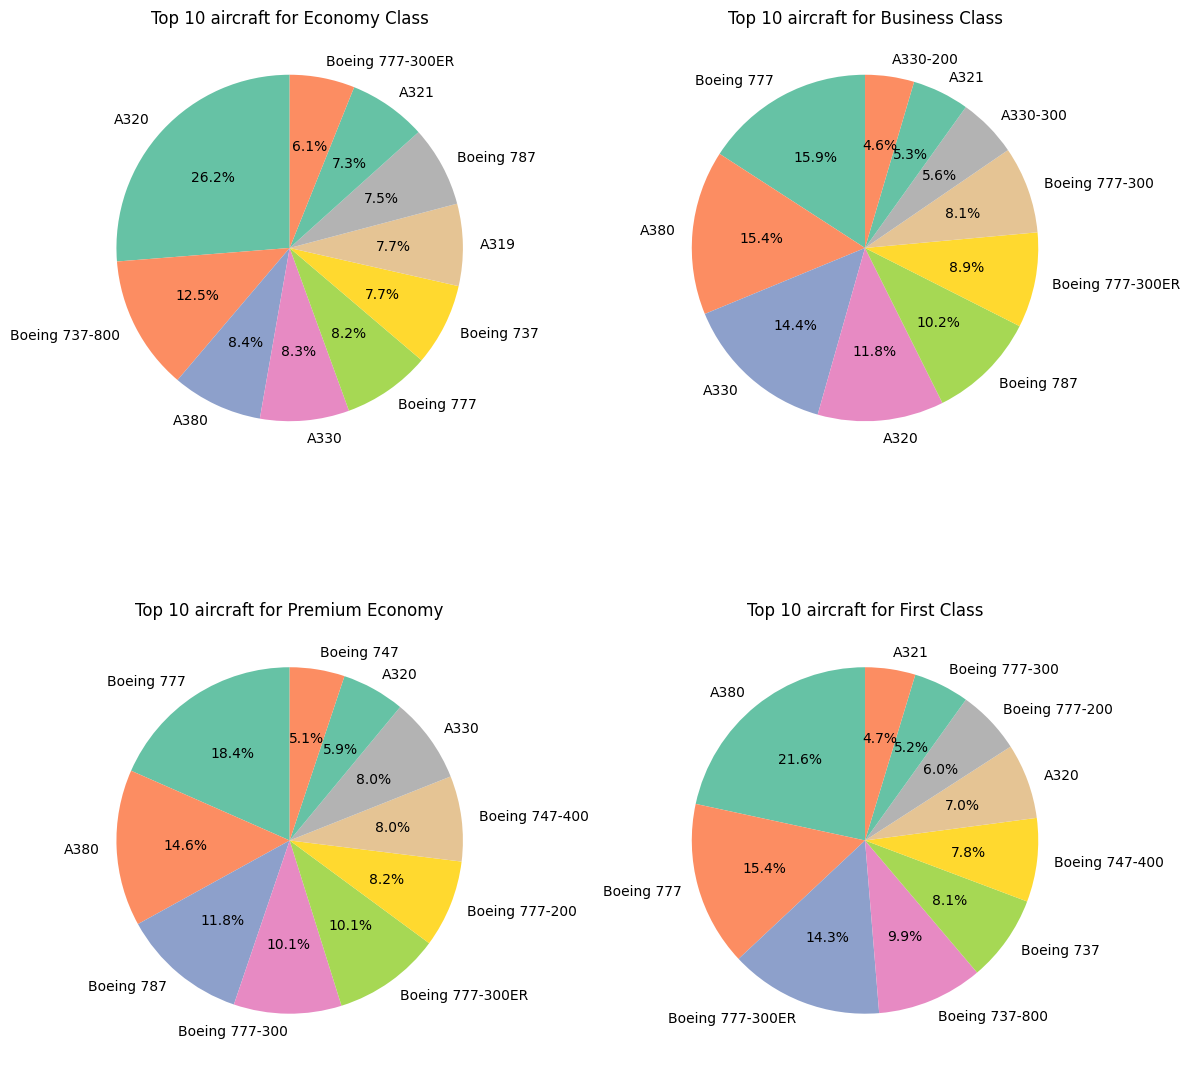

In [ ]:
# Chart - 9 visualization code
# Set the color palette to Set2
sns.set_palette("Set2")

# Set up the figure size for all subplots
plt.figure(figsize=(12, 12))

# Define a list of traveler types for iteration
cabin_type = ['Economy Class', 'Business Class', 'Premium Economy', 'First Class']

# Loop through each traveler type to create subplots
for i, cabin in enumerate(cabin_type, start=1):
    plt.subplot(2, 2, i)

    # Filter the DataFrame and get the top 5 aircraft
    top_aircraft = df[df['cabin'] == cabin]['aircraft'].value_counts().head(10)

    # Plot the pie chart with the Set2 palette
    top_aircraft.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", n_colors=len(top_aircraft)))

    # Set the title for each subplot
    plt.title(f'Top 10 aircraft for {cabin}')
    plt.ylabel('')  # Hide the y-label for better aesthetics

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This's the great way to understand percentage to total.

##### 2. What is/are the insight(s) found from the chart?

- **Dominant Aircraft:** The Airbus A320 and Boeing 737 families are the most frequent aircraft types across all cabin classes. This suggests their widespread use and potential influence on the overall passenger experience.
- **Cabin Class Variations:** Some aircraft types, such as the Boeing 777 and Airbus A380, appear more frequently in premium cabin classes (Business, First). This might indicate that these aircraft are more commonly used for long-haul flights or routes where premium cabins are more in demand.
- **Economy Class Dominance:** The pie chart for Economy Class shows a more diverse distribution of aircraft types, suggesting that a wider variety of aircraft are used for this cabin class.
- **Limited Data:** For Premium Economy and First Class, there is less data available, which may limit the ability to draw strong conclusions about aircraft preferences in these cabin classes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

- **Targeted Cabin Configuration:** Airlines can optimize cabin configurations based on the aircraft type. For example, if Boeing 777s are commonly used for premium cabins, they could consider increasing the number of Business or First Class seats on these aircraft.
- **Tailored Amenities:** Amenities and services could be customized based on the aircraft type and cabin class. This could involve offering premium amenities on aircraft frequently used for Business or First Class, while focusing on efficiency and cost-effectiveness for Economy Class.
- **Fleet Optimization:** The insights can inform decisions about aircraft acquisition and deployment. Airlines could prioritize aircraft types that are well-suited for specific cabin classes and routes.

Insights that Might Lead to Negative Growth

- **Limited Aircraft Choice:** If airlines solely focus on the most frequent aircraft types for specific cabin classes, they might miss opportunities to cater to niche markets or diversify their offerings.
- **Inconsistent Experiences:** If passenger experiences vary significantly across different aircraft types within the same cabin class, it could lead to dissatisfaction and negative word-of-mouth.
- **Overlooking Other Factors:** Focusing only on aircraft type might neglect other important factors influencing passenger satisfaction, such as seat comfort, entertainment options, and service quality.

#### Chart - 10. Histogram

<Figure size 1500x500 with 0 Axes>

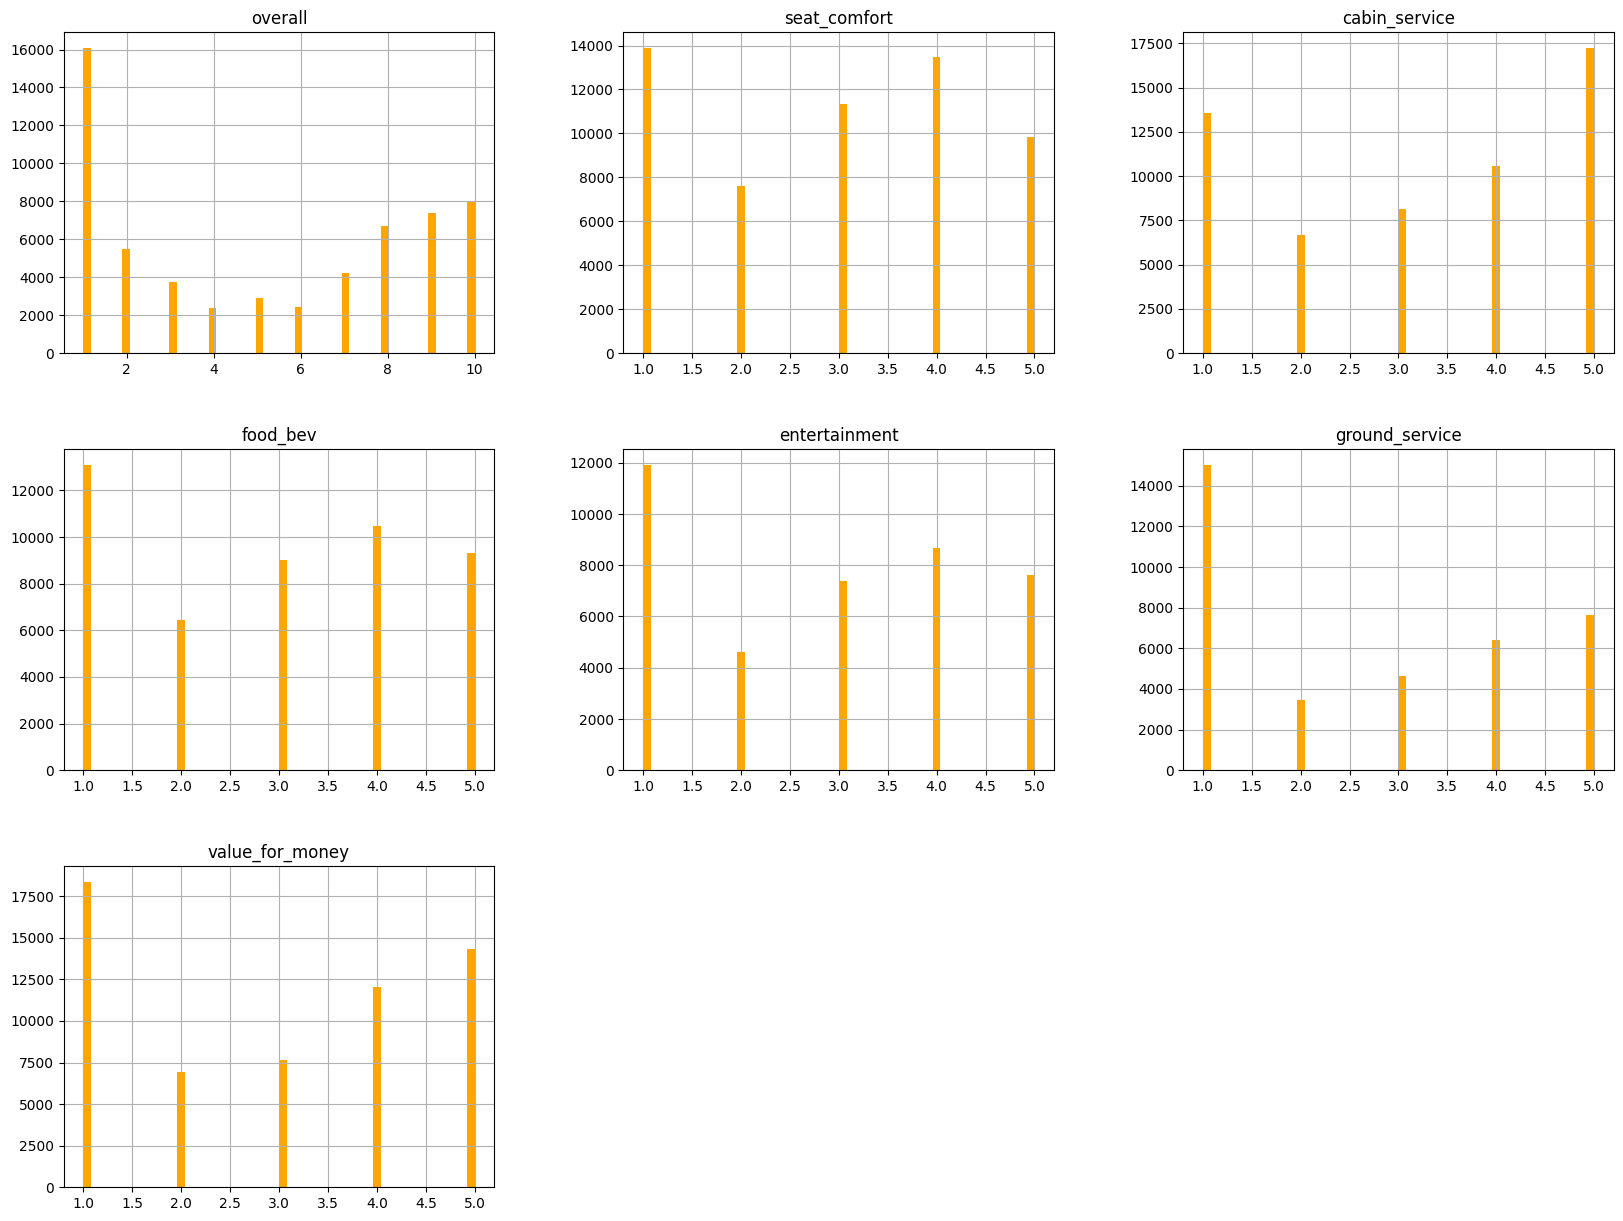

In [ ]:
# Chart - 10 visualization
plt.figure(figsize=(15,5))
df.hist(bins=50, figsize=(20,15),color = 'orange')
plt.show()

##### 1. Why did you pick the specific chart?

Shows distribution.

##### 2. What is/are the insight(s) found from the chart?

- **Overall Ratings:** The overall ratings are distributed across the range, with a slight skew towards higher ratings.
- **Seat Comfort:** seat_comfort ratings show a peak at 3 and 4, suggesting that most passengers find seat comfort to be satisfactory.
- **Cabin Service:** cabin_service ratings are also skewed towards higher values, indicating generally positive experiences with cabin service.
- **Food and Beverage:** food_bev ratings have a more even distribution, with a slight peak at 3.
Entertainment: entertainment ratings are concentrated around 3 and 4, suggesting a generally positive perception of in-flight entertainment.
- **Ground Service:** ground_service ratings have a peak at 4, indicating positive experiences with ground services.
Value for Money: value_for_money ratings are distributed more evenly, with a slight peak at 3.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

- **Identify Areas for Improvement:** Histograms can highlight areas where ratings are consistently lower. For example, if food_bev ratings are skewed towards lower values, airlines could investigate ways to improve their food and beverage offerings.
- **Benchmarking:** Compare the distributions of different features to identify areas where the airline excels or lags compared to industry standards.
Data-Driven Decisions: Use the insights to inform decisions about service improvements, resource allocation, and customer satisfaction initiatives.

Insights that Might Lead to Negative Growth

**Misinterpretation of Distributions:** Focusing solely on the peaks of the distributions might overlook areas where a significant portion of customers are dissatisfied.
- **Ignoring Outliers:** While histograms provide a general overview, they may not adequately represent extreme values or outliers, which could indicate serious service issues.
- **Lack of Context:** Histograms should be interpreted in conjunction with other analyses and data to get a complete picture of customer satisfaction.

#### Chart - 11. Count of Recommendations by Visit From and Visit To

In [ ]:
final_route = []
for route in df.route.values:
    if pd.isna(route):
        final_route.append((np.nan,np.nan))
    else:
        to_ind = str(route).find(' to ')
        via_idx = str(route).find(' via ')
        if via_idx == -1:
            final_route.append((str(route)[:to_ind],str(route)[to_ind+3:]))
        else:
            final_route.append((str(route)[:to_ind],str(route)[to_ind+3:via_idx]))

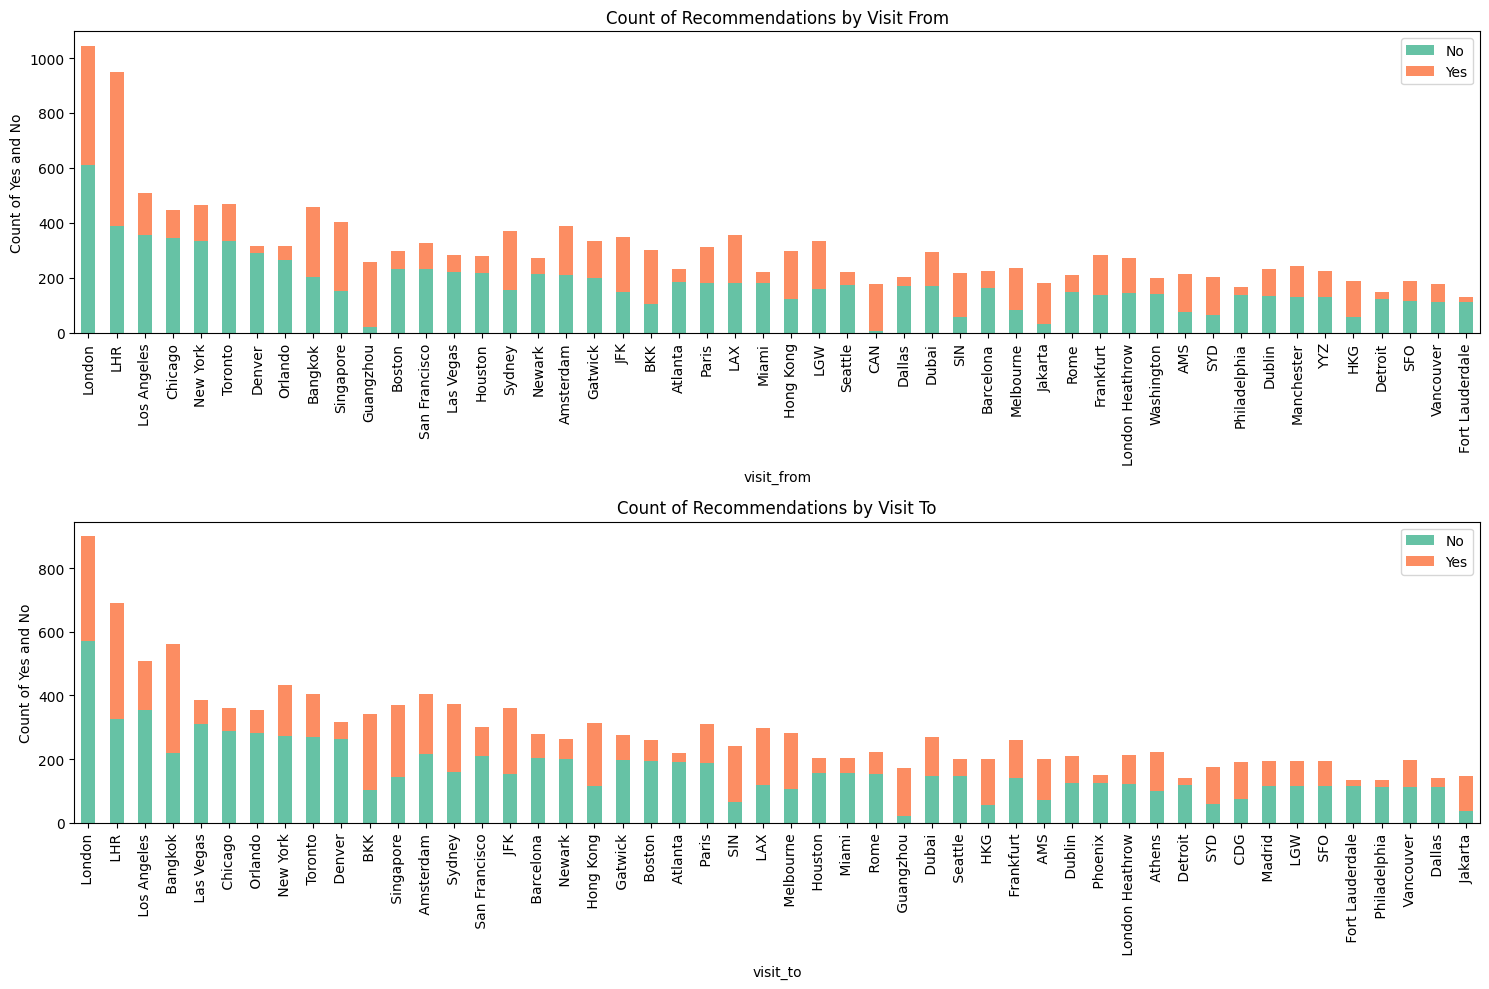

In [ ]:
# Chart - 11 visualization code

# Create a copy of the DataFrame and add visit_from and visit_to columns
temp = df.copy()
temp['visit_from'] = [x[0] for x in final_route]
temp['visit_to'] = [x[1] for x in final_route]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 10))

# Group by visit_from and recommended, then plot
visited_from = temp.groupby(['visit_from', 'recommended']).agg({'recommended': 'count'}).rename(columns={'recommended': 'count'}).sort_values(by='count', ascending=False).unstack()
visited_from[:50].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Count of Recommendations by Visit From')
ax1.set_ylabel('Count of Yes and No')
ax1.legend(['No', 'Yes'])

# Group by visit_to and recommended, then plot
visited_to = temp.groupby(['visit_to', 'recommended']).agg({'recommended': 'count'}).rename(columns={'recommended': 'count'}).sort_values(by='count', ascending=False).unstack()
visited_to[:50].plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Count of Recommendations by Visit To')
ax2.set_ylabel('Count of Yes and No')
ax2.legend(['No', 'Yes'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It's more easy to understand frequency with different class labels.

##### 2. What is/are the insight(s) found from the chart?

- **Popular Routes:** The chart highlights the most popular routes based on the frequency of recommendations. Some cities, like London, Paris, and New York, appear frequently in both visit_from and visit_to, indicating their significance as major travel hubs.
- **Recommendation Patterns:** Certain routes show a higher proportion of "yes" recommendations compared to others. This could indicate better service, more comfortable flights, or a more positive overall experience on those routes.
- **Regional Differences:** There might be regional variations in recommendation patterns. Some regions or countries might have a higher proportion of positive recommendations compared to others.
- **Potential Issues:** Routes with a high proportion of "no" recommendations could indicate potential issues with service, amenities, or other aspects of the travel experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

- **Route Optimization:** Identify routes with high satisfaction and allocate resources to maintain or enhance services on those routes. This could involve increasing flight frequency, using better aircraft, or offering premium services.
- **Targeted Improvements:** Investigate routes with a high proportion of negative recommendations to identify potential issues and implement targeted improvements. This could involve addressing concerns related to seat comfort, in-flight entertainment, or customer service.
- **Marketing and Promotion:** Promote routes with high satisfaction rates to attract more customers and increase bookings. Highlight the positive aspects of these routes, such as comfortable flights, excellent service, or convenient schedules.

Insights that Might Lead to Negative Growth

- **Ignoring Negative Feedback:** Neglecting routes with low satisfaction could lead to a decline in customer loyalty and negative word-of-mouth. This could impact future bookings and revenue.
- **Uneven Service Quality:** If service quality varies significantly across different routes, it could create inconsistencies in passenger experience and lead to dissatisfaction among certain customer segments.
- **Overlooking External Factors:** Focusing solely on internal factors might overlook external factors influencing satisfaction on specific routes, such as airport delays, weather conditions, or local events.

#### Chart - 12. Top 50 Airlines by Recommendation Count

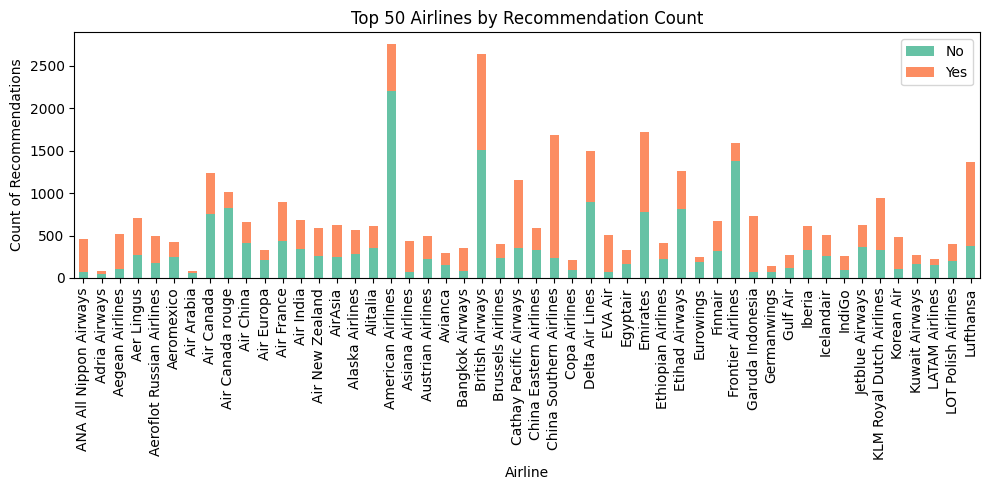

In [ ]:
# Chart - 12 visualization code
# Group by airline and recommended, then plot
airline_count = df.groupby(['airline', 'recommended']).agg({'recommended': 'count'}).rename(columns={'recommended': 'count'}).sort_values(by='count', ascending=False).unstack()

# Create the bar plot
airline_count[:50].plot(kind='bar', stacked=True, figsize=(10, 5))

# Set the legend and labels
plt.legend(['No', 'Yes'])
plt.title('Top 50 Airlines by Recommendation Count')
plt.xlabel('Airline')
plt.ylabel('Count of Recommendations')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

##### 1. Why did you pick the specific chart?

It's more easy to understand frequency with different class labels.

##### 2. What is/are the insight(s) found from the chart?

- **Top Recommended Airlines:** The chart quickly identifies airlines with a high proportion of "yes" recommendations, such as Qatar Airways, Singapore Airlines, and ANA All Nippon Airways. This suggests these airlines excel in providing positive customer experiences.
- **Airlines Needing Improvement:** Airlines with a higher proportion of "no" recommendations, like Spirit Airlines, Frontier Airlines, and easyJet, might need to focus on improving customer satisfaction.
- **Competitive Analysis:** The chart enables airlines to compare their performance with competitors and identify areas where they excel or need improvement. This can inform strategic decisions and initiatives to enhance customer experience.
- **Data-Driven Decisions:** Airlines can use this information to make data-driven decisions regarding service improvements, marketing strategies, and resource allocation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

- **Benchmarking and Best Practices:** Airlines can benchmark their performance against top-rated competitors and identify best practices to adopt. This could involve analyzing specific areas where high-rated airlines excel, such as seat comfort, in-flight entertainment, or customer service.
- **Targeted Improvements:** Focus on areas where the airline receives a high proportion of negative recommendations. This could involve improving seat comfort, offering better food and beverage options, or enhancing the overall customer service experience.
- **Marketing and Branding:** Highlight positive recommendations and customer satisfaction in marketing campaigns to attract new customers and build brand loyalty. This could involve showcasing positive reviews, awards, or customer testimonials.

Insights that Might Lead to Negative Growth

- **Ignoring Negative Feedback:** Neglecting to address areas with high negative recommendations could lead to a decline in customer satisfaction and damage the airline's reputation. This could impact future bookings and revenue.
- **Complacency:** Airlines with high satisfaction rates should not become complacent. Continuous monitoring and improvement are essential to maintain a competitive edge and adapt to evolving customer expectations.
- **Misinterpreting Data:** Focusing solely on overall recommendation counts might overlook specific areas of concern or dissatisfaction within different customer segments.

#### Chart - 13. Box Plot

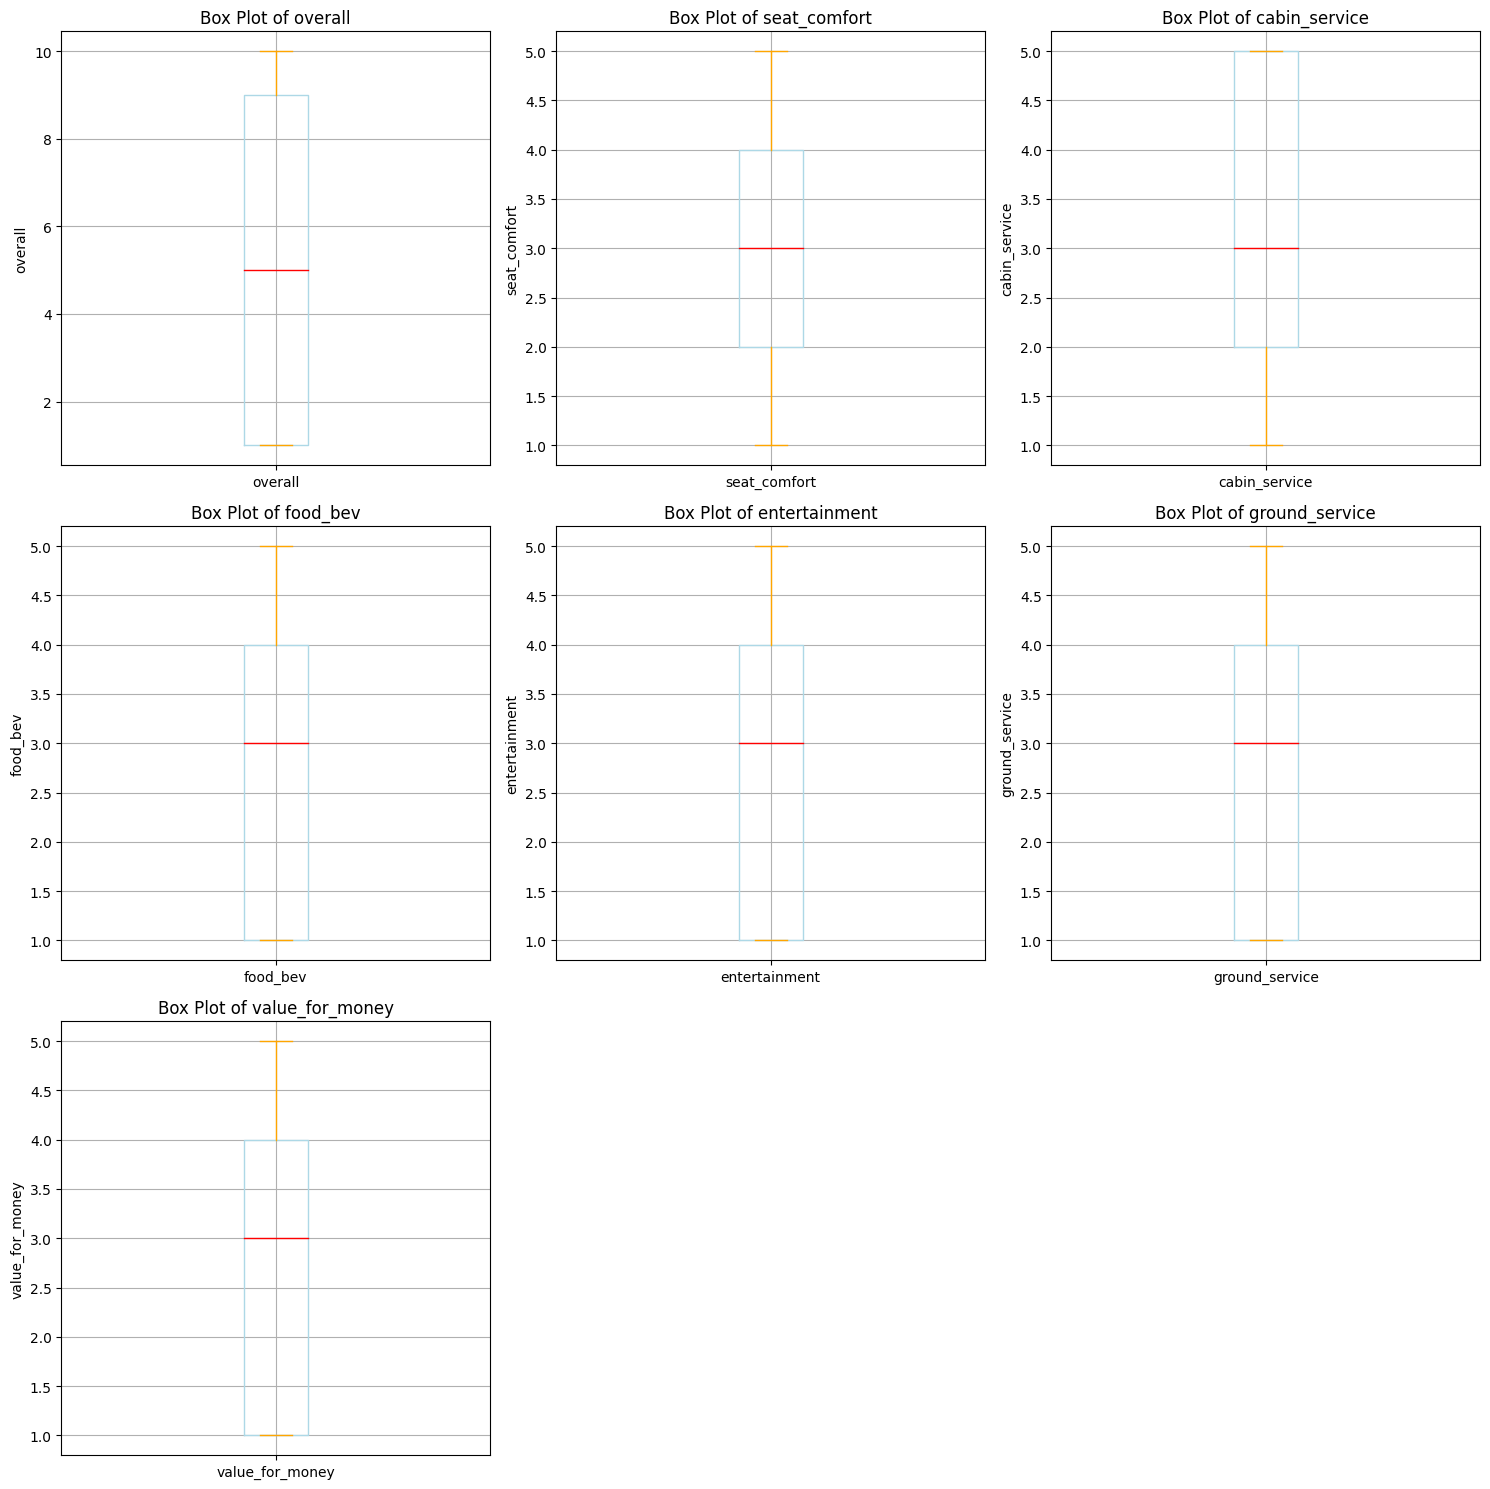

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Set up the figure size and create subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define colors for the box plots
box_color = 'lightblue'
whisker_color = 'orange'
median_color = 'red'

# Loop through each numeric column to create individual box plots
for i, column in enumerate(numeric_columns):
    df.boxplot(column=column, ax=axes[i],
                boxprops=dict(color=box_color),
                whiskerprops=dict(color=whisker_color),
                capprops=dict(color=whisker_color),
                medianprops=dict(color=median_color))
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Helpfull for visualizing outliers.

##### 2. What is/are the insight(s) found from the chart?

- **Distribution and Central Tendency:** Box plots provide a visual representation of the distribution of each feature, including the median, quartiles, and potential outliers.
- **Outliers:** The presence of outliers (data points beyond the whiskers) suggests potential areas where service quality might be inconsistent or where some passengers had significantly different experiences.
- **Feature Comparisons:** Comparing the box plots for different features allows for a quick assessment of their relative distributions and variability.
- **Identifying Potential Issues:** Features with wider interquartile ranges (IQR) or a larger number of outliers might indicate areas where service quality is more variable and requires attention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

- **Identify Areas for Improvement:** Box plots can highlight features with lower medians or larger IQRs, suggesting potential areas for service improvement. For example, if food_bev has a lower median and a wider IQR compared to other features, it might indicate inconsistent food and beverage quality.
- **Investigate Outliers:** Analyzing outliers can reveal specific instances of exceptionally positive or negative experiences. This can help airlines understand the factors contributing to those experiences and identify best practices or areas for improvement.
- **Service Consistency:** By focusing on reducing the IQR and minimizing outliers, airlines can improve service consistency and provide a more predictable and positive experience for passengers.

Insights that Might Lead to Negative Growth

- **Misinterpreting Outliers:** Not all outliers represent negative experiences. Some outliers might indicate exceptionally positive feedback, which can provide valuable insights.
- **Ignoring Context:** Box plots should be analyzed in context with other data and information. For example, an outlier in seat_comfort might be related to a specific aircraft type or cabin class.
- **Overlooking Positive Trends:** Focusing solely on negative outliers or low medians might overlook positive trends or areas where the airline excels.

#### Chart - 14 - Correlation Heatmap

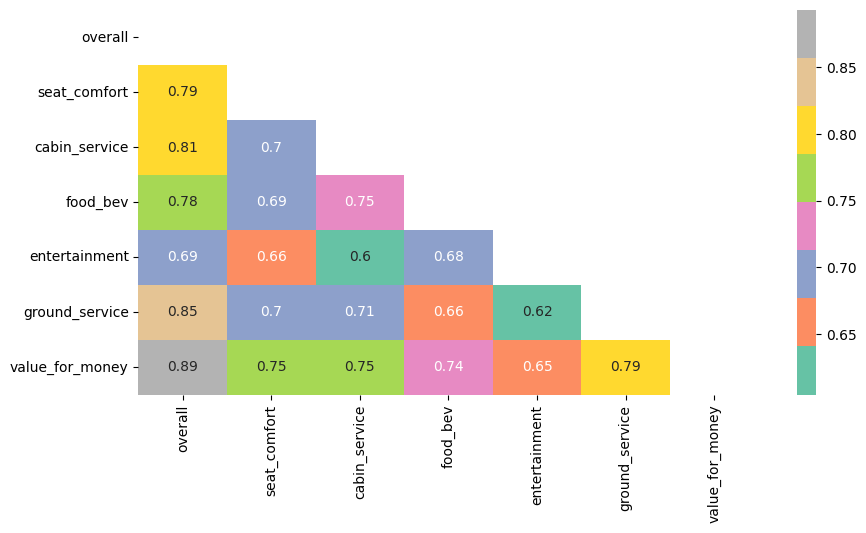

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))
corr = df.select_dtypes(exclude='object').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='Set2')
plt.show()

##### 1. Why did you pick the specific chart?

Shows correlation between features

##### 2. What is/are the insight(s) found from the chart?

overall with value for money and cabin service showing strong correlation > 80 and rest all between 60 to 80.

#### Chart - 15 - Pair Plot

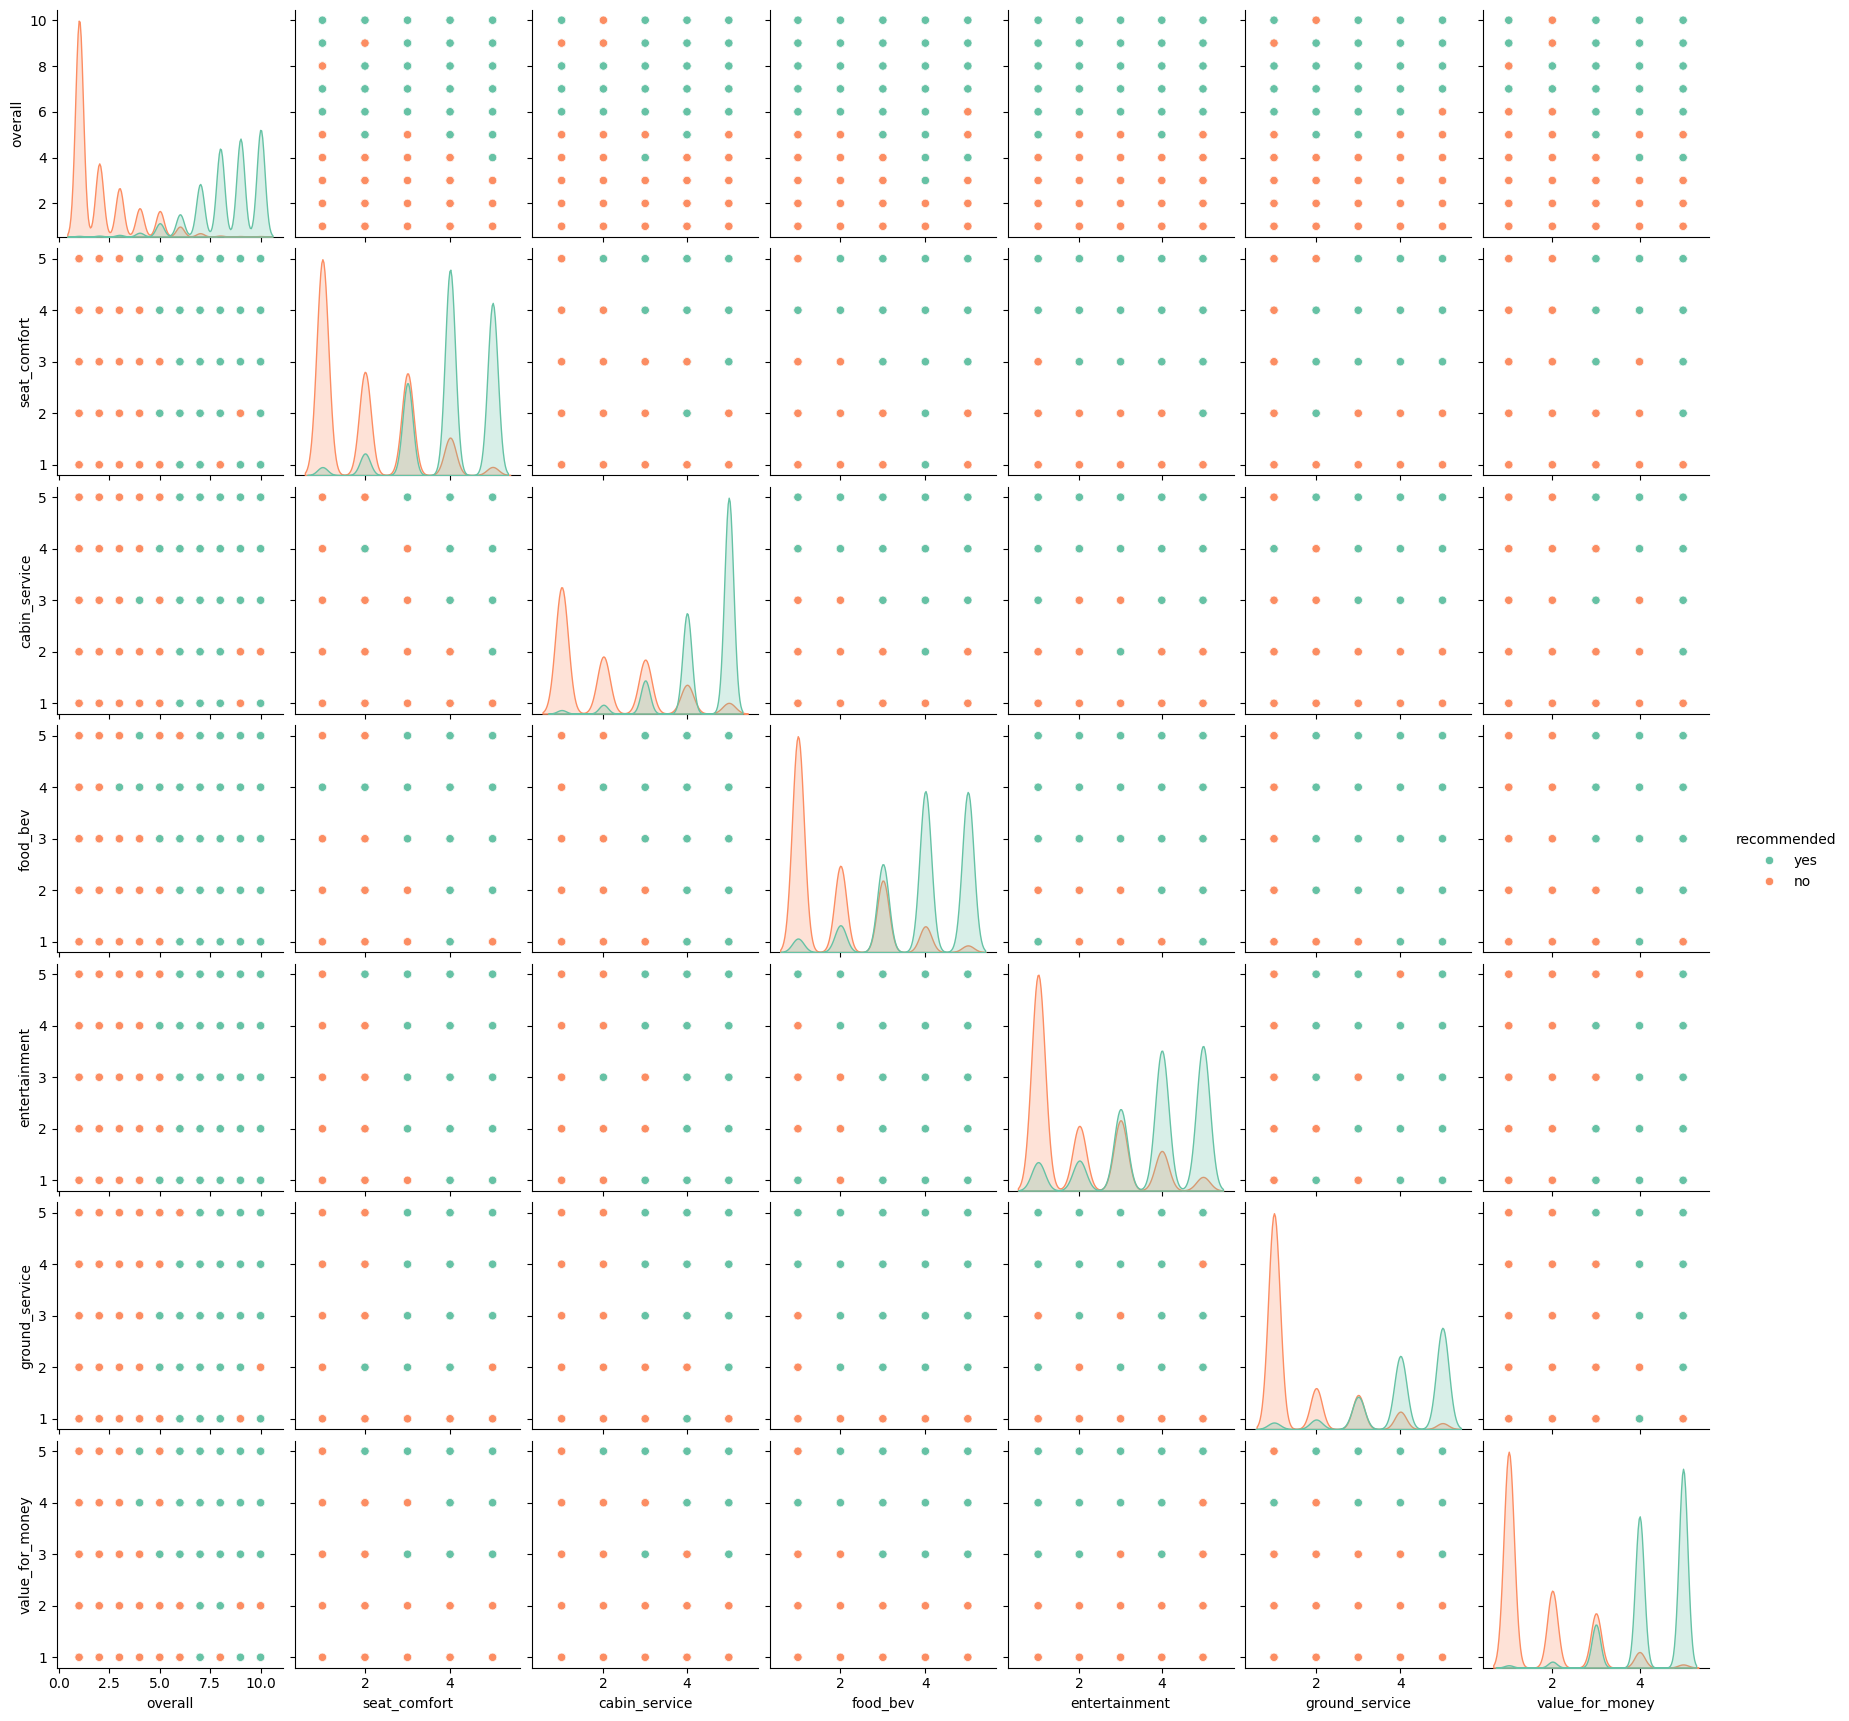

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue='recommended', palette='Set2')
plt.show()

##### 1. Why did you pick the specific chart?

Multivatite plots

##### 2. What is/are the insight(s) found from the chart?

Data is evenly distributed.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1. The average overall rating for recommended flights is higher than the average overall rating for flights that are not recommended.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis: There is no difference in the average overall rating between recommended and not recommended flights.
- Alternative Hypothesis: The average overall rating for recommended flights is higher than the average overall rating for flights that are not recommended.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Ensure 'recommended' and 'overall' columns are in the correct format
df['recommended'] = df['recommended'].str.lower()  # Convert to lowercase for consistency
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')  # Convert to numeric, coercing errors

# Separate data for recommended and not recommended flights
recommended = df[df['recommended'] == 'yes']['overall'].dropna()
not_recommended = df[df['recommended'] == 'no']['overall'].dropna()

# Check if there are enough samples to perform the t-test
if len(recommended) < 2 or len(not_recommended) < 2:
    print("Not enough data to perform the t-test.")
else:
    # Perform independent samples t-test
    t_stat, p_value = ttest_ind(recommended, not_recommended, alternative='greater')

    # Print results
    print(f'T-statistic: {t_stat:.4f}')
    print(f'P-value: {p_value:.4f}')

    # Interpret the results
    if p_value < 0.05:
        print("\nReject the null hypothesis.")
        print("There is a statistically significant difference in the average overall rating between recommended and not recommended flights.")
        print("The average overall rating for recommended flights is higher than that for flights that are not recommended.")
    else:
        print("\nFail to reject the null hypothesis.")
        print("There is no statistically significant difference in the average overall rating between recommended and not recommended flights.")
        print("The average overall rating for recommended flights is not higher than that for flights that are not recommended.")

T-statistic: 493.7903
P-value: 0.0000

Reject the null hypothesis.
There is a statistically significant difference in the average overall rating between recommended and not recommended flights.
The average overall rating for recommended flights is higher than that for flights that are not recommended.


##### Which statistical test have you done to obtain P-Value?

**Independent Samples T-Test**:
   - **Purpose**: To compare the means of two independent groups (e.g., recommended vs. not recommended flights, Business Class vs. Economy Class) to determine if there is a statistically significant difference between them.
   - **P-Value**: The P-value obtained from this test indicates whether the difference in means is statistically significant. A low P-value (typically < 0.05) suggests that the means are significantly different.

##### Why did you choose the specific statistical test?

**Independent Samples T-Test (Recommended vs. Not Recommended Flights)**: The independent samples t-test was chosen to compare the overall ratings between recommended and not recommended flights because it is suitable for assessing the means of two independent groups when the dependent variable (overall rating) is continuous. This test allows us to determine if there is a statistically significant difference in the average ratings between the two groups, providing insights into the impact of recommendation status on customer satisfaction.

### Hypothetical Statement - 2. There is a relationship between the type of traveler and the likelihood of recommending a flight.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis: There is no relationship between traveler type and the likelihood of recommending a flight.
- Alternative Hypothesis: There is a relationship between traveler type and the likelihood of recommending a flight.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Ensure 'traveller_type' and 'recommended' columns are in the correct format
df['traveller_type'] = df['traveller_type'].astype(str)  # Ensure traveller_type is a string
df['recommended'] = df['recommended'].str.lower()  # Convert to lowercase for consistency

# Create a contingency table
contingency_table = pd.crosstab(df['traveller_type'], df['recommended'])

# Check if the contingency table has enough data
if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
    print("Not enough data to perform the chi-squared test.")
else:
    # Perform chi-squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print(f'Chi-squared statistic: {chi2_stat:.4f}')
    print(f'P-value: {p_value:.4f}')
    print(f'Degrees of freedom: {dof}')
    print(f'Expected frequencies:\n{expected}')

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("\nReject the null hypothesis.")
        print("There is a statistically significant association between traveller type and recommendation status.")
    else:
        print("\nFail to reject the null hypothesis.")
        print("There is no statistically significant association between traveller type and recommendation status.")

Chi-squared statistic: 1400.2115
P-value: 0.0000
Degrees of freedom: 4
Expected frequencies:
[[ 3539.04305484  3224.95694516]
 [ 5074.68636736  4624.31363264]
 [ 3736.8192634   3405.1807366 ]
 [ 7290.51240776  6643.48759224]
 [11626.93890664 10595.06109336]]

Reject the null hypothesis.
There is a statistically significant association between traveller type and recommendation status.


##### Which statistical test have you done to obtain P-Value?

**Chi-Squared Test of Independence**:
   - **Purpose**: To assess whether there is a significant association between two categorical variables (e.g., traveller type and recommendation status). This test evaluates whether the distribution of sample categorical data matches an expected distribution.
   - **P-Value**: The P-value from the chi-squared test indicates whether there is a significant association between the two categorical variables. A low P-value (typically < 0.05) suggests that the variables are associated.

##### Why did you choose the specific statistical test?

**Chi-Squared Test of Independence (Traveller Type vs. Recommendation Status)**: The chi-squared test of independence was utilized to examine the association between traveller type and recommendation status. This test is appropriate for analyzing the relationship between two categorical variables, allowing us to determine if there is a significant association between the type of traveller and whether they recommend the flight. By employing this test, we can gain insights into how different traveller types perceive and recommend flights, which can inform marketing and service strategies.

### Hypothetical Statement - 3. Seat comfort ratings are higher for flights in Business class compared to Economy class.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis: There is no difference in seat comfort ratings between Business and Economy class flights.
- Alternative Hypothesis: Seat comfort ratings are higher for Business class flights compared to Economy class flights.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Ensure 'cabin' and 'seat_comfort' columns are in the correct format
df['cabin'] = df['cabin'].str.strip()  # Remove any leading/trailing whitespace
df['seat_comfort'] = pd.to_numeric(df['seat_comfort'], errors='coerce')  # Convert to numeric, coercing errors

# Separate data for Business and Economy class
business_class = df[df['cabin'] == 'Business Class']['seat_comfort'].dropna()
economy_class = df[df['cabin'] == 'Economy Class']['seat_comfort'].dropna()

# Check if there are enough samples to perform the t-test
if len(business_class) < 2 or len(economy_class) < 2:
    print("Not enough data to perform the t-test.")
else:
    # Perform independent samples t-test
    t_stat, p_value = ttest_ind(business_class, economy_class, alternative='greater')

    # Print results
    print(f'T-statistic: {t_stat:.4f}')
    print(f'P-value: {p_value:.4f}')

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("\nReject the null hypothesis.")
        print("There is a statistically significant difference in seat comfort ratings between Business Class and Economy Class.")
        print("The average seat comfort rating for Business Class is higher than that for Economy Class.")
    else:
        print("\nFail to reject the null hypothesis.")
        print("There is no statistically significant difference in seat comfort ratings between Business Class and Economy Class.")
        print("The average seat comfort rating for Business Class is not higher than that for Economy Class.")

T-statistic: 51.8378
P-value: 0.0000

Reject the null hypothesis.
There is a statistically significant difference in seat comfort ratings between Business Class and Economy Class.
The average seat comfort rating for Business Class is higher than that for Economy Class.


##### Which statistical test have you done to obtain P-Value?

**Independent Samples T-Test (for Seat Comfort)**:
   - **Purpose**: Similar to the first test, this t-test compares the means of seat comfort ratings between two groups (Business Class vs. Economy Class) to determine if there is a statistically significant difference in their ratings.
   - **P-Value**: The P-value from this test indicates whether the average seat comfort rating for Business Class is significantly higher than that for Economy Class. A low P-value (typically < 0.05) suggests a significant difference in seat comfort ratings.

##### Why did you choose the specific statistical test?



**Independent Samples T-Test (Business Class vs. Economy Class)**: Another independent samples t-test was employed to evaluate the difference in seat comfort ratings between Business Class and Economy Class. Similar to the previous analysis, this test is appropriate for comparing the means of two independent groups with a continuous dependent variable. By using this test, we can ascertain whether passengers in Business Class report significantly higher seat comfort ratings compared to those in Economy Class.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### Understanding and Checking `Central tedency` for filling nan values

In [ ]:
## Spliting Numerical and Categorical columns
numerical_columns = df.select_dtypes(exclude='object')
categorical_columns = df.select_dtypes(include='object')

print(f"Numerical Columns: {numerical_columns.shape}")
print(f"Categorical Columns: {categorical_columns.shape}")

Numerical Columns: (61184, 7)
Categorical Columns: (61184, 10)


In [ ]:
## Checking mean
numerical_columns.mean()

overall            5.164863
seat_comfort       2.959278
cabin_service      3.200231
food_bev           2.926956
entertainment      2.887994
ground_service     2.681347
value_for_money    2.950849
dtype: float64

In [ ]:
## Checking median
numerical_columns.median()

overall            5.0
seat_comfort       3.0
cabin_service      3.0
food_bev           3.0
entertainment      3.0
ground_service     3.0
value_for_money    3.0
dtype: float64

In [ ]:
categorical_columns.isna().sum()

airline                1
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type         0
cabin               2479
route              23671
date_flown         23750
recommended         1423
dtype: int64

In [ ]:
## Checking mean
for col in categorical_columns:
  if col != 'customer_review':
    print(f"{categorical_columns[col].mode()}\n")

0    Spirit Airlines
Name: airline, dtype: object

0    Anders Pedersen
Name: author, dtype: object

0    19th January 2015
Name: review_date, dtype: object

0    A320
Name: aircraft, dtype: object

0    nan
Name: traveller_type, dtype: object

0    Economy Class
Name: cabin, dtype: object

0    BKK to LHR
Name: route, dtype: object

0    August 2015
Name: date_flown, dtype: object

0    no
Name: recommended, dtype: object



In [ ]:
categorical_columns['traveller_type'].value_counts()

traveller_type
nan               23644
Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: count, dtype: int64

In [ ]:
# Handling Missing Values & Missing Value Imputation
for col in numerical_columns.columns:
  numerical_columns[col] = numerical_columns[col].fillna(value=numerical_columns[col].median())

for col in categorical_columns.columns:
  if col != 'customer_review' and col != 'traveller_type':
    categorical_columns[col] = categorical_columns[col].fillna(value=categorical_columns[col].mode()[0])
  elif col == 'traveller_type':
    categorical_columns[col] = categorical_columns[col].fillna(value='Solo Leisure')

new_df = pd.concat([numerical_columns, categorical_columns], axis=1)

In [ ]:
new_df.isna().sum()

overall            0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
airline            0
author             0
review_date        0
customer_review    1
aircraft           0
traveller_type     0
cabin              0
route              0
date_flown         0
recommended        0
dtype: int64

In [ ]:
new_df.dropna(inplace=True, axis=0)

#### What all missing value imputation techniques have you used and why did you use those techniques?

For Numerical columns i have used median imputation and mode for categorical columns

### 2. Handling Outliers

We don't have any outliers in our dataset.

### 3. Categorical Encoding

In [ ]:
new_df.select_dtypes(include='object').nunique()

airline               81
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         5
cabin                  4
route              24549
date_flown            63
recommended            2
dtype: int64

In [ ]:
## Mapping 'no' with 0 and 'yes' with 1
new_df['recommended'] = new_df['recommended'].map({'no': 0.0, 'yes': 1.0})

In [ ]:
## Applying one-hot encoding
feature_onehot = pd.get_dummies(new_df[['airline', 'aircraft', 'traveller_type', 'cabin']], drop_first=True)

In [ ]:
feature_onehot.shape

(61183, 2174)

#### What all categorical encoding techniques have you used & why did you use those techniques?

For target i have applied simple mapping i.e., 0 for no and 1 for yes.

where as for `airline`, `aircraft`, `traveller_type`, `cabin` used one-hot encoding.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
## Downloding english stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
lemmatizer=WordNetLemmatizer()
swords = set(stopwords.words('english'))

def CleanText(text, stopwords_lan, base_case):
  # lowering texts
  clr_text = text.apply(lambda x : x.lower())
  print("- Applied lowercased.")

  # replacing speacial char
  clr_text = clr_text.apply(lambda x : x.replace('âœ',"'"))
  clr_text = clr_text.apply(lambda x : ''.join([c for c in x if ord(c) < 128]))
  print("- Applied special character removal.")

  # removing extra spaces
  clr_text = clr_text.apply(lambda x : " ".join(x.split()))
  print("- Applied extra space removal.")

  # punctuation handling
  clr_text = clr_text.apply(lambda x : x.translate(str.maketrans('','',string.punctuation)))
  print("- Applied punctuation removal.")

  # removing html tags
  clr_text = clr_text.apply(lambda x :  re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
  clr_text = clr_text.apply(lambda x : " ".join(s for s in x.split() if not any(c.isdigit() for c in s)))
  print("- Applied html tag removal.")

  # removing stopwords
  clr_text = clr_text.apply(lambda text: " ".join(word for word in text.split() if not word in stopwords_lan))
  print("- Applied stopwords removal.")

  # applying lemmatization
  clr_text = clr_text.apply(lambda x :" ".join([base_case.lemmatize(word) for word in word_tokenize(x)]))
  print("- Applied lemmatization.")
  print("- Processing Completed Sucessfully.")

  return clr_text

In [ ]:
## Before Cleaning
new_df['customer_review'][1]

'âœ… Trip Verified | London to Izmir via Istanbul. First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and pl

In [ ]:
## applying text cleaning
text_cleaning = CleanText(new_df['customer_review'], swords, lemmatizer)

- Applied lowercased.
- Applied special character removal.
- Applied extra space removal.
- Applied punctuation removal.
- Applied html tag removal.
- Applied stopwords removal.
- Applied lemmatization.
- Processing Completed Sucessfully.


In [ ]:
## After cleaning
text_cleaning[1]

'trip verified london izmir via istanbul first time id flown tk found good air cabin crew plane food nice great ground ground staff call centre computer system flight lhr delayed missed connection istanbul ground staff dont speak english given contradictory instruction could speak little english eventually got flight izmir three hour later wasnt easy process made worse vast distance one walk gate cavernous new airport also id phoned tk call centre based ukraine pay extra way extra leg room seat however departure time kept changing seat kept changing return leg london istanbul given extra leg room seat luckily spare exit row seat cabin crew sorted overall think cabin crew plane good ground staff call centre staff need better training need better computer system software work'

#### Text Vectorization

In [ ]:
# Vectorizing Text
vectorizer = TfidfVectorizer(max_features=500)
vectorized_text = vectorizer.fit_transform(text_cleaning)
print(vectorized_text.shape)

(61183, 500)


##### Which text vectorization technique have you used and why?

**I have applied Tf-Idf vectorizer.**

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in information retrieval and text mining.

It reflects how important a word is to a document in a collection of documents.

- **TF (Term Frequency):** Measures how frequently a term occurs in a document.
- **IDF (Inverse Document Frequency):** Measures how important a term is. It is calculated as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

After applying an One-Hot encoding to an categorical features the dimention of the data increases and same thing after applying text vectorization.

In [ ]:
# DImensionality Reduction (If needed)
review_dense = vectorized_text.toarray()
review_pca = PCA(n_components=2)
review_pca_data = review_pca.fit_transform(review_dense)
print(f"- Dimentation Reduction for customer review: {review_pca_data.shape}")

cat_col_dense = feature_onehot.values
cat_col_pca = PCA(n_components=3)
cat_col_pca_data = cat_col_pca.fit_transform(cat_col_dense)
print(f"- Dimentation Reduction for categorical columns: {cat_col_pca_data.shape}")

- Dimentation Reduction for customer review: (61183, 2)
- Dimentation Reduction for categorical columns: (61183, 3)


In [ ]:
new_df.select_dtypes(include='object').columns

Index(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'date_flown'],
      dtype='object')

In [ ]:
## Droping all categorical columns
new_df.drop(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
             'traveller_type', 'cabin', 'route', 'date_flown'], axis=1, inplace=True)

In [ ]:
cols_name_review = ['review_pca_1', 'review_pca_2']
cols_name_cat = ['cat_col_pca_1', 'cat_col_pca_2', 'cat_col_pca_3']

review_df = pd.DataFrame(review_pca_data, columns=cols_name_review)
cat_df = pd.DataFrame(cat_col_pca_data, columns=cols_name_cat)

In [ ]:
## Final DataFrame
new_df = new_df.reset_index(drop=True)
final_df = pd.concat([new_df, review_df, cat_df], axis=1)
final_df.shape

(61183, 13)

In [ ]:
final_df.head().style.background_gradient(cmap='Set2')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
features = final_df.drop('recommended', axis=1)
target = final_df['recommended']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (48946, 12)
X_test: (12237, 12)
y_train: (48946,)
y_test: (12237,)


##### What data splitting ratio have you used and why?

80:20. Because that's standard protocols.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
log_model = LogisticRegression()

# Fit the Algorithm
log_model.fit(X_train, y_train)

# Predict on the model
y_pred = log_model.predict(X_test)

In [ ]:
# Checking the coefficients
log_model.coef_

array([[ 0.65420502,  0.25827234,  0.50600671,  0.15400864,  0.10086009,
         0.2314934 ,  1.03906914,  2.61152111,  2.59052306, -0.60447665,
        -0.10403851,  0.15592171]])

In [ ]:
# Checking the intercept value
log_model.intercept_

array([-11.02010456])

In [ ]:
# Get the predicted classes
train_class_preds = log_model.predict(X_train)
test_class_preds = log_model.predict(X_test)

# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("- The accuracy on train data is ", train_accuracy)
print("- The accuracy on test data is ", test_accuracy)

- The accuracy on train data is  0.9481060760838476
- The accuracy on test data is  0.9498243033423225


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[24839  1345]
 [ 1195 21567]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

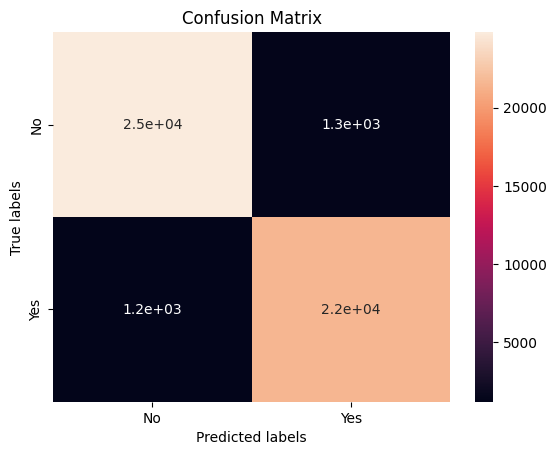

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['No', 'Yes']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6194  312]
 [ 302 5429]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

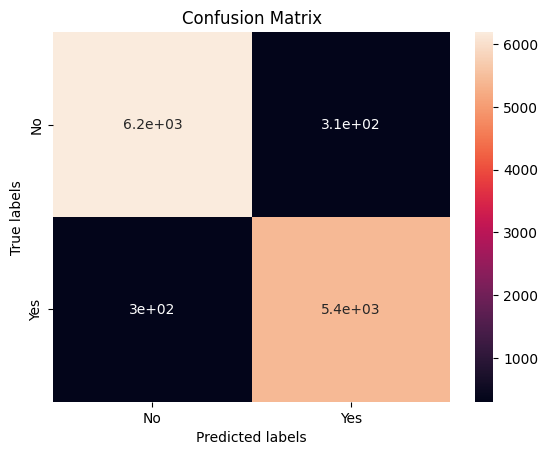

In [ ]:
labels = ['No', 'Yes']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     26034
         1.0       0.95      0.94      0.94     22912

    accuracy                           0.95     48946
   macro avg       0.95      0.95      0.95     48946
weighted avg       0.95      0.95      0.95     48946

 
roc_auc_score
0.948066486245253


In [ ]:
print(classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      6496
         1.0       0.95      0.95      0.95      5741

    accuracy                           0.95     12237
   macro avg       0.95      0.95      0.95     12237
weighted avg       0.95      0.95      0.95     12237

 
roc_auc_score
0.9496742011172807


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
log_model_tune = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['l2','l1']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Use RandomizedSearchCV for faster hyperparameter tuning
grid_search = GridSearchCV(estimator=log_model_tune, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.944275 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print(classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     26034
         1.0       0.95      0.94      0.94     22912

    accuracy                           0.95     48946
   macro avg       0.95      0.95      0.95     48946
weighted avg       0.95      0.95      0.95     48946

 
roc_auc_score
0.948066486245253


In [ ]:
print(classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      6496
         1.0       0.95      0.95      0.95      5741

    accuracy                           0.95     12237
   macro avg       0.95      0.95      0.95     12237
weighted avg       0.95      0.95      0.95     12237

 
roc_auc_score
0.9496742011172807


In [ ]:
## Final Logistic Reg model
lr_model = LogisticRegression(C=10, penalty='l2', solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(C=10)

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV** which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like **Random Search**, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes their is very mariginal improvenment.

#### Training and Testing metrics before hyperparameter tuning

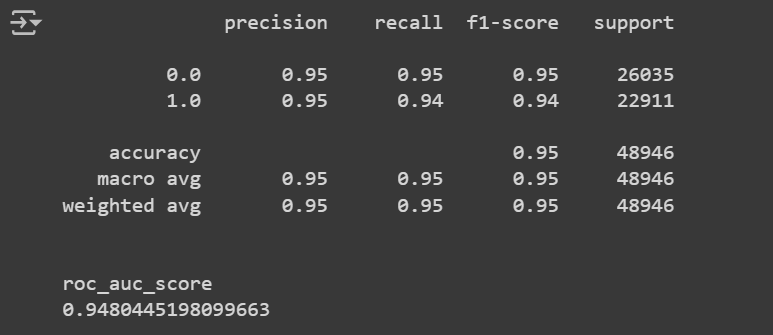

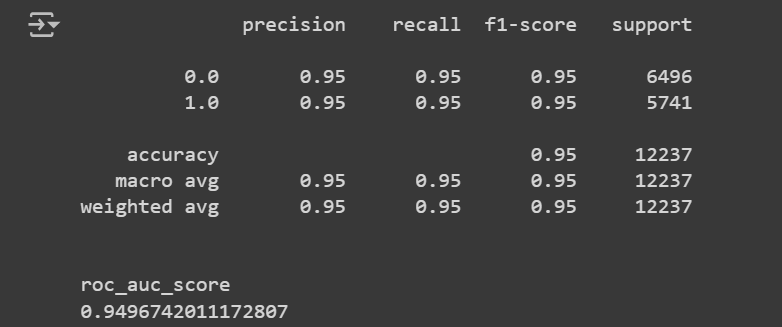

#### Training and Testing metrics after hyperparameter tuning

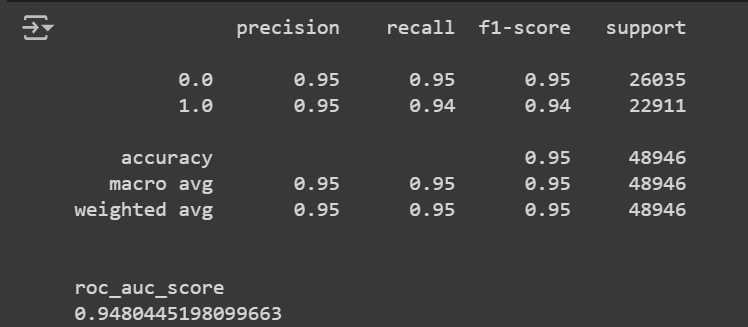

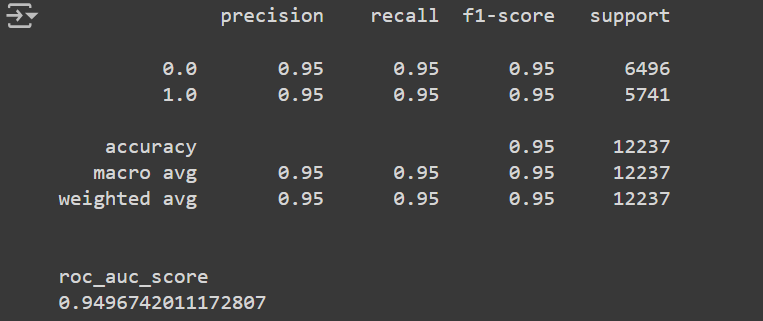

All the metrics are showing very consistent results even after hyperparameter tuning.
So let's explore some other model and evaluate the results.



### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.959385470295007


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[26184     0]
 [    0 22762]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

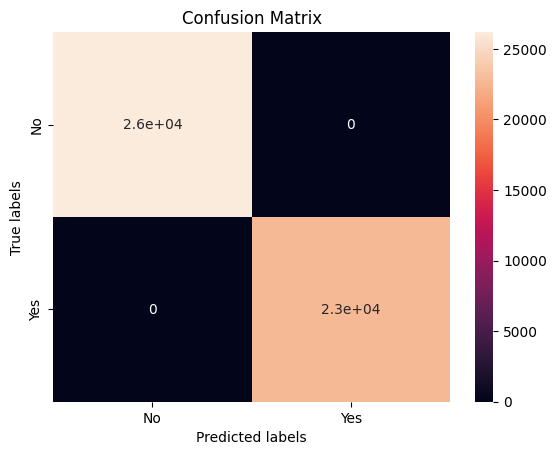

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['No', 'Yes']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6299  207]
 [ 290 5441]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

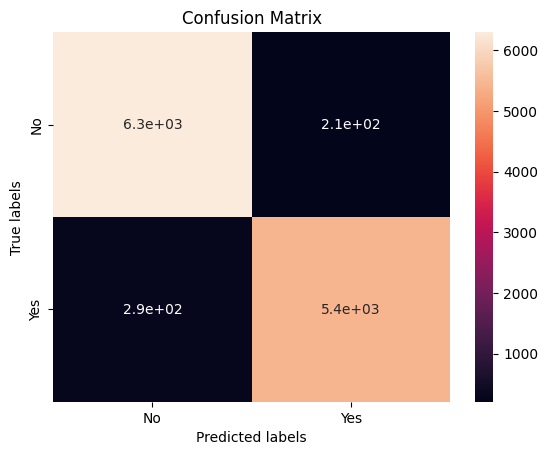

In [ ]:
labels = ['No', 'Yes']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26184
         1.0       1.00      1.00      1.00     22762

    accuracy                           1.00     48946
   macro avg       1.00      1.00      1.00     48946
weighted avg       1.00      1.00      1.00     48946

 
roc_auc_score
1.0


In [ ]:
print(classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      6589
         1.0       0.95      0.96      0.96      5648

    accuracy                           0.96     12237
   macro avg       0.96      0.96      0.96     12237
weighted avg       0.96      0.96      0.96     12237

 
roc_auc_score
0.9587906131558736


In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           overall                0.29
6   value_for_money                0.21
2     cabin_service                0.14
1      seat_comfort                0.09
7      review_pca_1                0.07
3          food_bev                0.06
5    ground_service                0.04
4     entertainment                0.02
8      review_pca_2                0.02
9     cat_col_pca_1                0.02
10    cat_col_pca_2                0.02
11    cat_col_pca_3                0.02

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

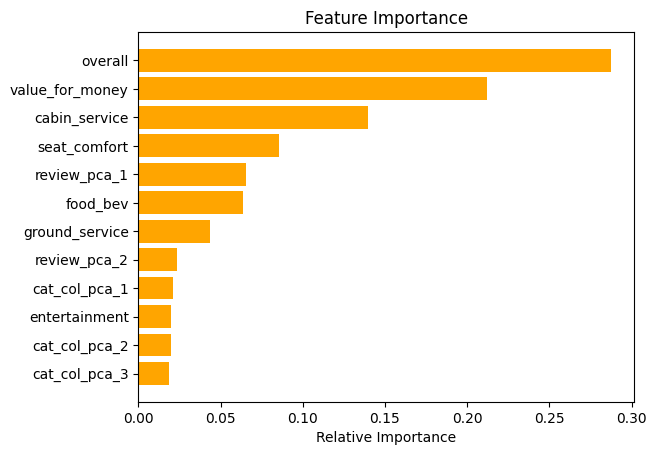

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=0, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)

In [ ]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.955170 using {'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


[[25423   761]
 [ 1243 21519]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

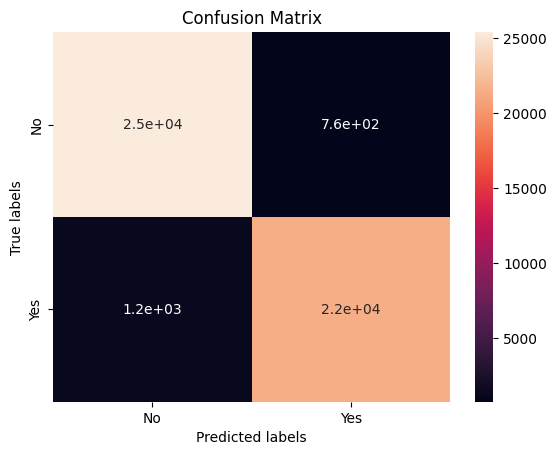

In [ ]:
labels = ['No', 'Yes']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6314  192]
 [ 337 5394]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

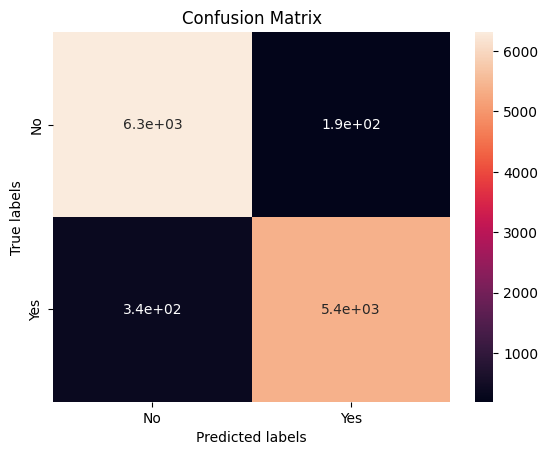

In [ ]:
labels = ['No', 'Yes']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     26666
         1.0       0.95      0.97      0.96     22280

    accuracy                           0.96     48946
   macro avg       0.96      0.96      0.96     48946
weighted avg       0.96      0.96      0.96     48946

 
roc_auc_score
0.958163945808556


In [ ]:
print(classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      6651
         1.0       0.94      0.97      0.95      5586

    accuracy                           0.96     12237
   macro avg       0.96      0.96      0.96     12237
weighted avg       0.96      0.96      0.96     12237

 
roc_auc_score
0.9558428891833226


##### Which hyperparameter optimization technique have you used and why?

In [ ]:
## Final Randon Forest model
rf_model = RandomForestClassifier(max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=40, min_samples_split=50)

**GridSearchCV** which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like **Random Search**, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### Training and Testing metrics before hyperparameter tuning

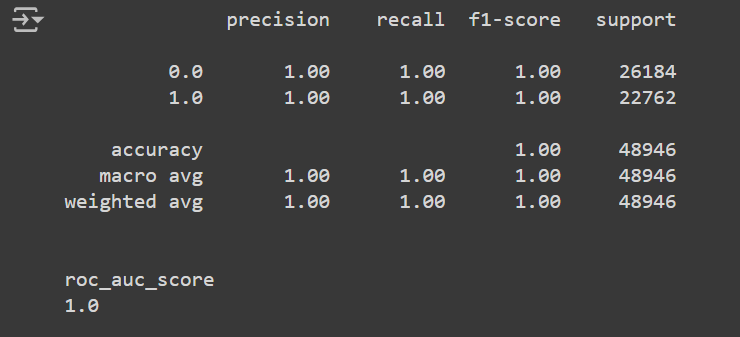

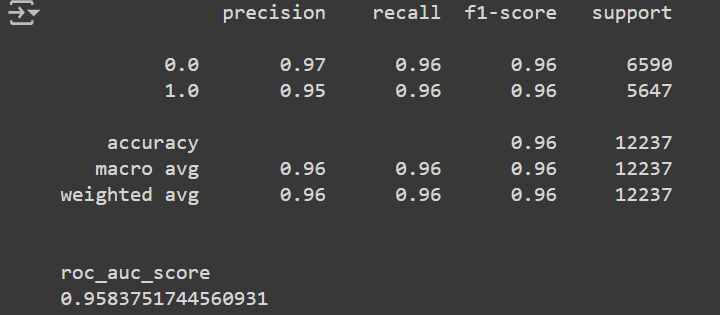

#### Training and Testing metrics after hyperparameter tuning

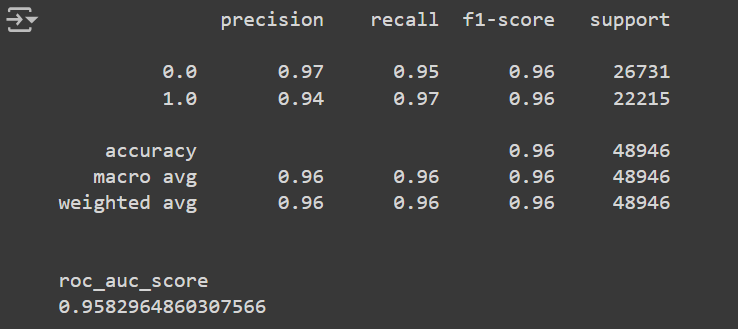

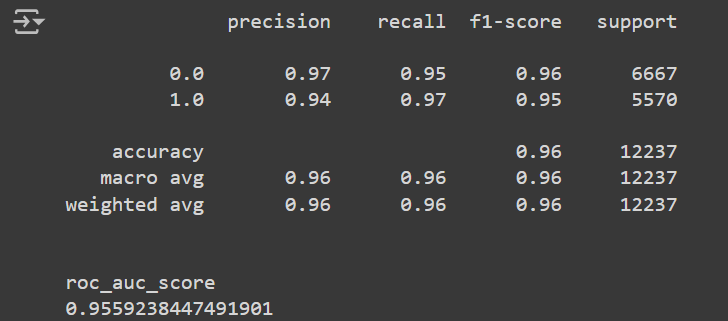

As we can see at first model overfit but after tuning model giving consistent accruacy (96%) and other metrics as well.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9810403301597679
The accuracy on test dataset is 0.9584865571627033


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[25814   370]
 [  558 22204]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

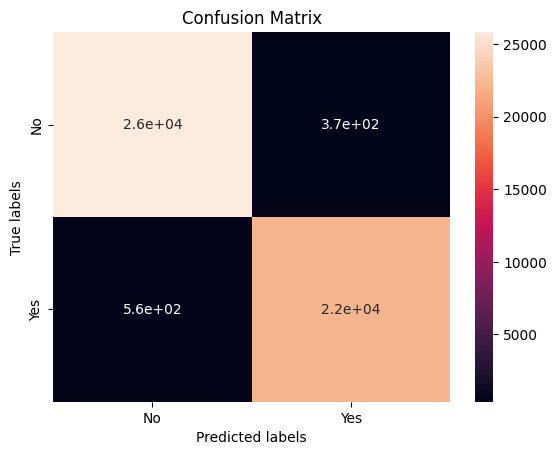

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['No', 'Yes']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6289  217]
 [ 291 5440]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

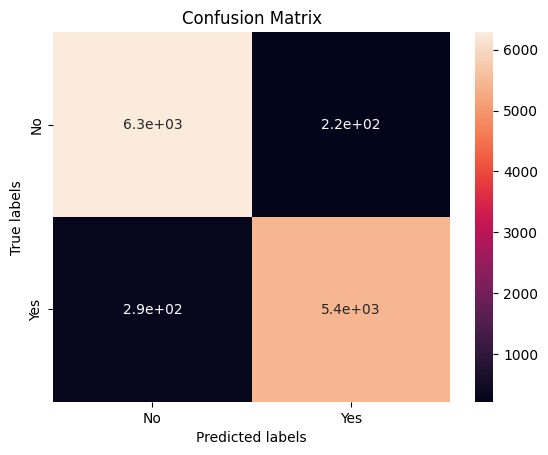

In [ ]:
labels = ['No', 'Yes']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     26372
           1       0.98      0.98      0.98     22574

    accuracy                           0.98     48946
   macro avg       0.98      0.98      0.98     48946
weighted avg       0.98      0.98      0.98     48946

 
roc_auc_score
0.9806773456696513


In [ ]:
print(classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6580
           1       0.95      0.96      0.96      5657

    accuracy                           0.96     12237
   macro avg       0.96      0.96      0.96     12237
weighted avg       0.96      0.96      0.96     12237

 
roc_auc_score
0.9579348469820457


In [ ]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           overall                0.84
6   value_for_money                0.07
2     cabin_service                0.02
1      seat_comfort                0.01
3          food_bev                0.01
4     entertainment                0.01
5    ground_service                0.01
7      review_pca_1                0.01
8      review_pca_2                0.01
9     cat_col_pca_1                0.01
10    cat_col_pca_2                0.01
11    cat_col_pca_3                0.01

In [ ]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

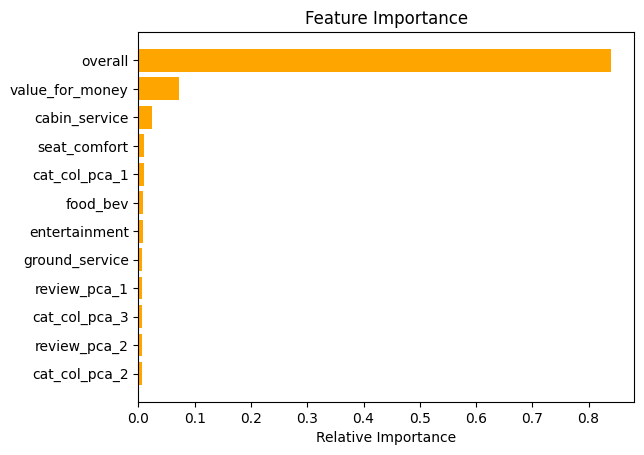

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=0, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

In [ ]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.991946 using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9623462591427288
The accuracy on test dataset is 0.9588134346653592


[[25425   759]
 [ 1084 21678]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

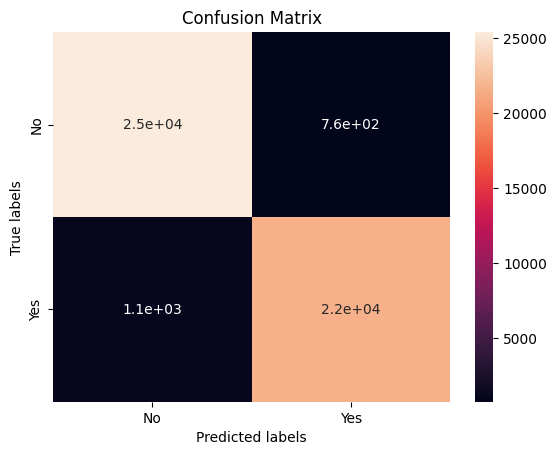

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['No', 'Yes']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6298  208]
 [ 296 5435]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

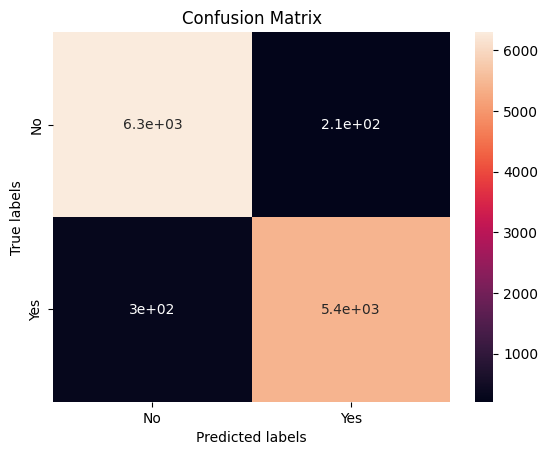

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['No', 'Yes']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     26509
           1       0.95      0.97      0.96     22437

    accuracy                           0.96     48946
   macro avg       0.96      0.96      0.96     48946
weighted avg       0.96      0.96      0.96     48946

 
roc_auc_score
0.9616948002810093


In [ ]:
print(classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6594
           1       0.95      0.96      0.96      5643

    accuracy                           0.96     12237
   macro avg       0.96      0.96      0.96     12237
weighted avg       0.96      0.96      0.96     12237

 
roc_auc_score
0.9581902921657809


##### Which hyperparameter optimization technique have you used and why?

In [ ]:
## Final XGBoost model
xg_model = XGBClassifier(max_depth = 4, min_samples_leaf = 40, min_samples_split = 50, n_estimators = 50)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=50, n_jobs=None, ...)

**GridSearchCV** which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like **Random Search**, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### Training and Testing metrics before hyperparameter tuning

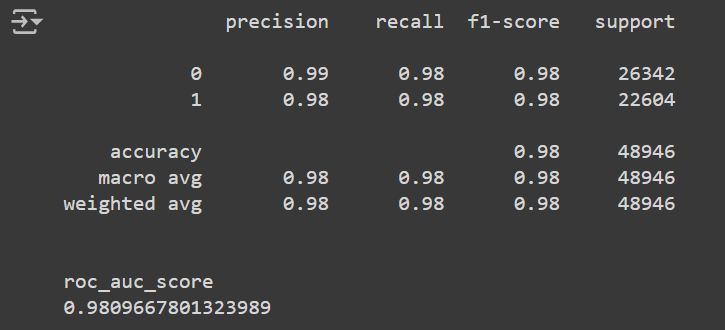

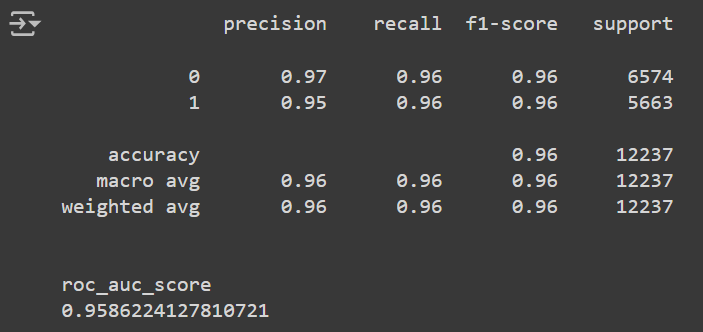

#### Training and Testing metrics after hyperparameter tuning

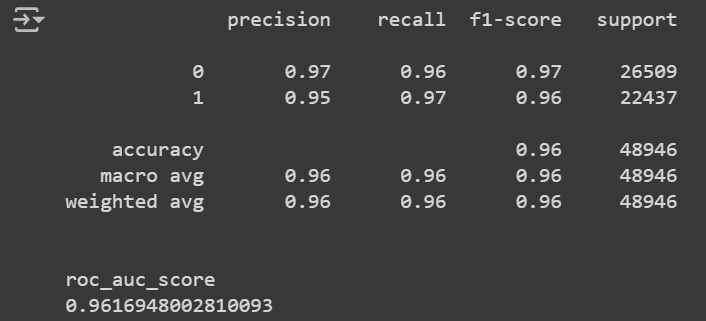

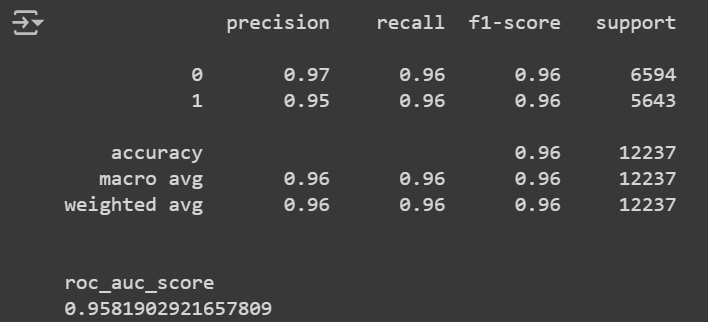

Just like Random Forset, XGBoost also overfit at first. But after hyperparameter it's also giving an accruacy of around 96%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Our dataset is balanced so i have consider the F1-score because it's the harmonic mean of precision and recall and provides a single metric that balances both concerns. This is useful if both false positives and false negatives have significant consequences.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Model 3** appears to be the best model based on its consistently high performance across all metrics—particularly its strong ROC AUC scores, accuracy, and slightly better recall and F1-scores compared to the other models. Model 2 is a close second but Model 3 offers a slight edge in several key areas.

Whereas, All three models perform similarly well in terms of generalization (minimal gap between training and testing metrics), with no clear signs of overfitting in any of them. However, based on this analysis, Model 1 has the smallest variation between training and testing, which suggests it generalizes slightly better than Models 2 and 3.

But, Model 3 offers the best overall performance (higher ROC AUC and strong recall/F1-scores), making it the best choice in terms of predictive power.

Given the small performance differences, Model 3 still seems like the best choice, as it balances strong performance with good generalization.

In [ ]:
# Function to plot AUC-ROC curve for multiple models
def plot_multiple_roc(models, model_names, y_true):
    plt.figure(figsize=(8, 6))

    # Plot ROC curve for each model
    for model, name in zip(models, model_names):
        fpr, tpr, _ = roc_curve(y_true, model)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot the diagonal for random classifier
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.50)')

    # Aesthetic customizations
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
rf_model.predict_proba(X_test)[:, 1]

array([0.02520988, 0.98627819, 0.99415388, ..., 0.99352571, 0.01750152,
       0.0091176 ])

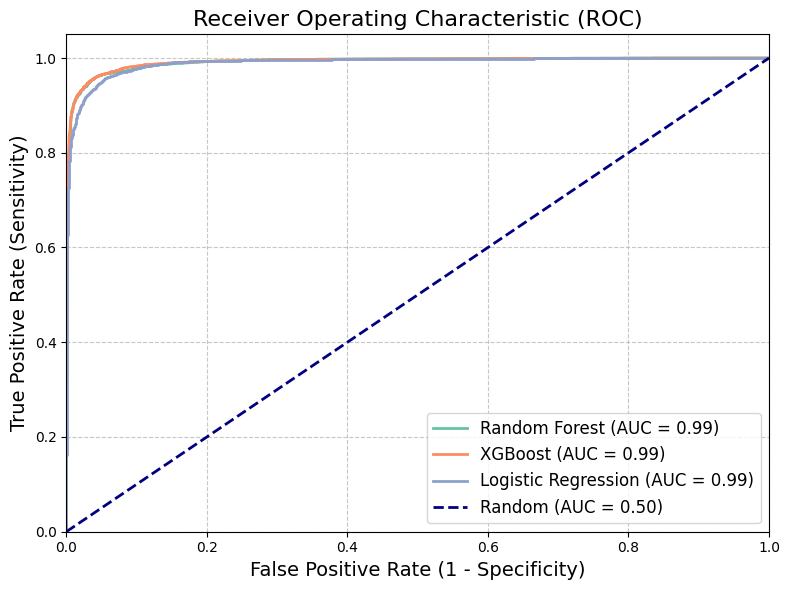

In [ ]:
plot_multiple_roc([rf_model.predict_proba(X_test)[:, 1], xg_model.predict_proba(X_test)[:, 1], lr_model.predict_proba(X_test)[:, 1]], ['Random Forest', 'XGBoost', 'Logistic Regression'], y_test)

In [ ]:
## Plotting AUC-ROC curve for Model 3
def plot_roc_curve(y_true, y_scores):
    # Calculate the ROC curve points
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')

    # Plot a diagonal dashed line for random classifier
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Customization for aesthetics
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)

    # Adding grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adding a shaded area for the AUC score
    plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')

    # Show plot
    plt.tight_layout()
    plt.show()

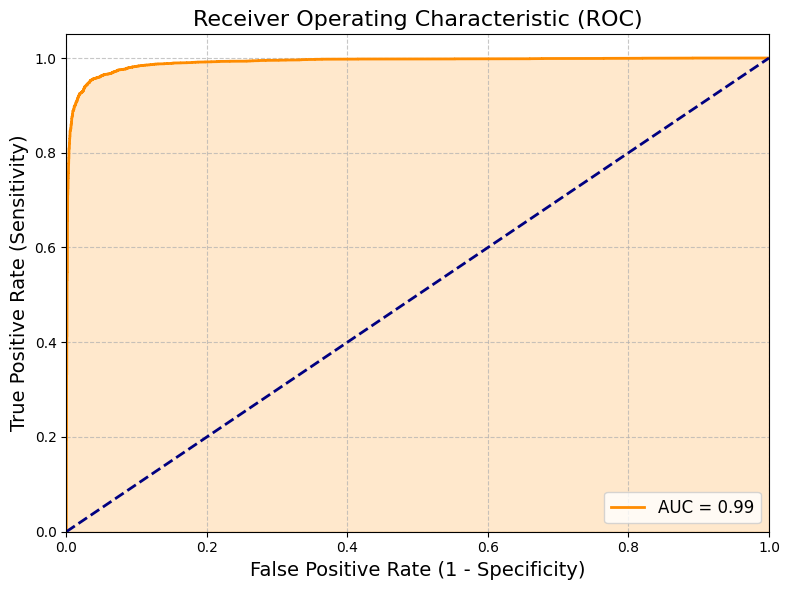

In [ ]:
plot_roc_curve(y_test, xg_models.predict_proba(X_test)[:, 1])

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Get shap values
explainer = shap.Explainer(xg_models)
shap_values = explainer(X_test)

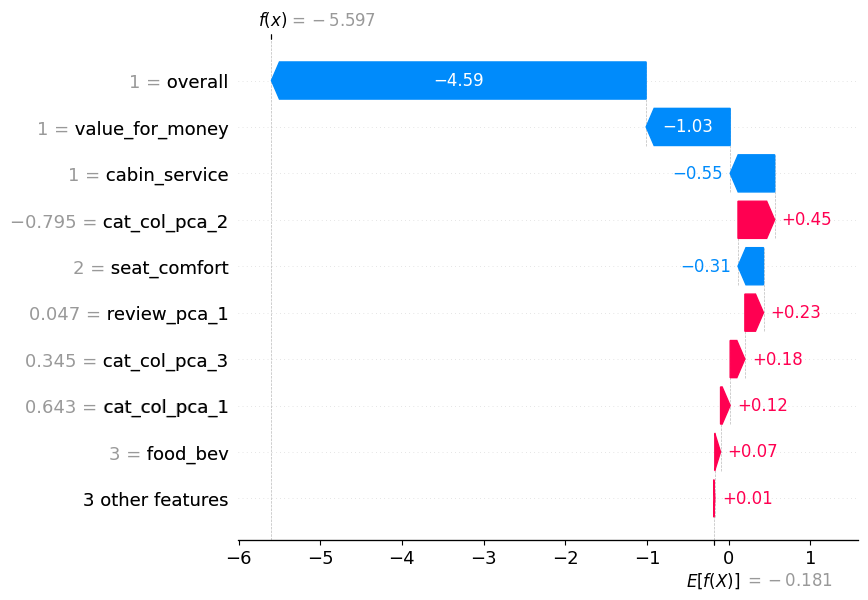

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

This is a **waterfall chart**, which is a type of bar chart that shows the cumulative effect of multiple factors on a final outcome. In this case, the chart shows the factors that contribute to the overall score of a product or service, which is represented by the value f(x) = -5.504.

**Key elements of the chart:**

* **Horizontal axis:** Represents the range of possible values for the final outcome, E[f(x)].
* **Vertical axis:** Represents the individual factors that contribute to the final outcome.
* **Bars:** Each bar represents a factor, and its length indicates its contribution to the final outcome.
* **Arrows:** The arrows show how the factors accumulate to reach the final outcome.

**Interpretation of the chart:**

* **Overall score:** The final outcome, f(x), is -5.504, which is located on the horizontal axis.
* **Factors:** The chart shows the individual factors that contribute to this overall score.
* **Positive contributions:** Factors with positive values (e.g., cat_col_pca_1, cat_col_pca_2, cat_col_pca_3) contribute positively to the overall score.
* **Negative contributions:** Factors with negative values (e.g., overall, value_for_money, cabin_service, seat_comfort, review_pca_1, review_pca_2) contribute negatively to the overall score.
* **Cumulative effect:** The arrows show how the factors accumulate to reach the final outcome. For example, the overall score starts at -4.5 and decreases further due to the negative contributions of other factors.

**In summary:**

The waterfall chart provides a visual representation of how different factors contribute to the overall score of a product or service. By examining the factors with the largest positive or negative contributions, you can identify the key drivers of the overall score and focus on improving or addressing these factors to enhance the product or service.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases res will compress. you can see we start at the same base value of -5.504.

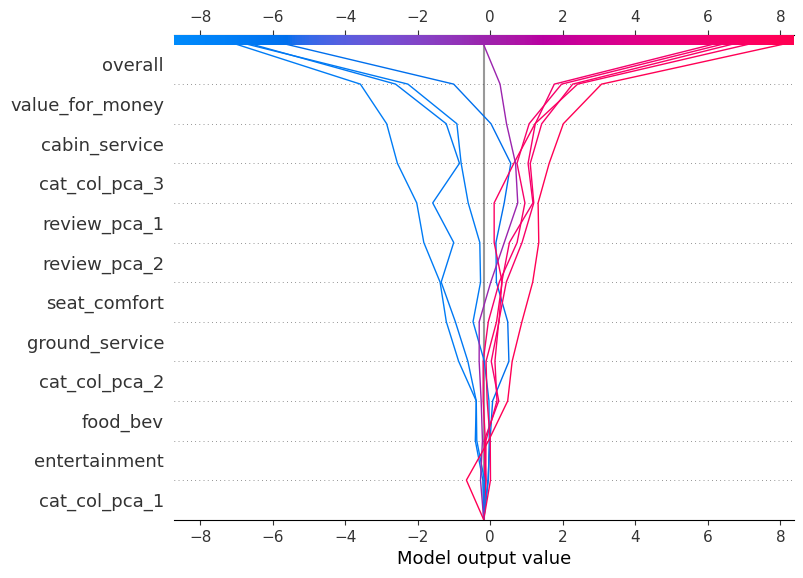

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

The waterfall chart shows the factors that contribute to the overall score of a product or service. Each line represents a different instance or observation, and the colors may indicate different categories or groups. Factors that move the lines to the right contribute positively to the overall score, while factors that move the lines to the left contribute negatively. By examining the factors that consistently move the lines in a particular direction, you can identify the key drivers of the overall score and focus on improving or addressing these factors to enhance the product or service.


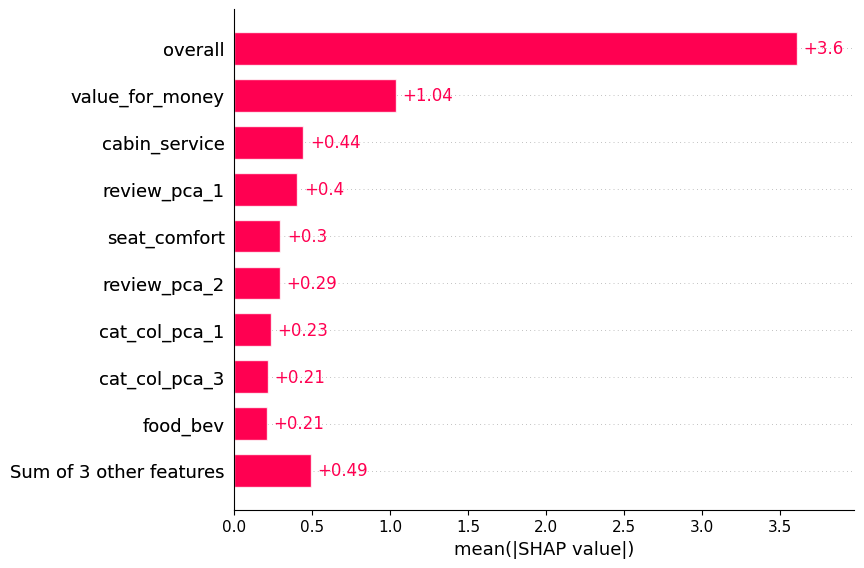

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

The bar chart shows the importance of different factors in predicting the overall score of a product or service. Each factor is represented by a bar, and the length of the bar indicates its importance. Factors with longer bars are more important than factors with shorter bars. The color of the bars may indicate whether the factor has a positive or negative impact on the overall score. By examining the factors with the longest bars, you can identify the key drivers of the overall score and focus on improving or addressing these factors to enhance the product or service.


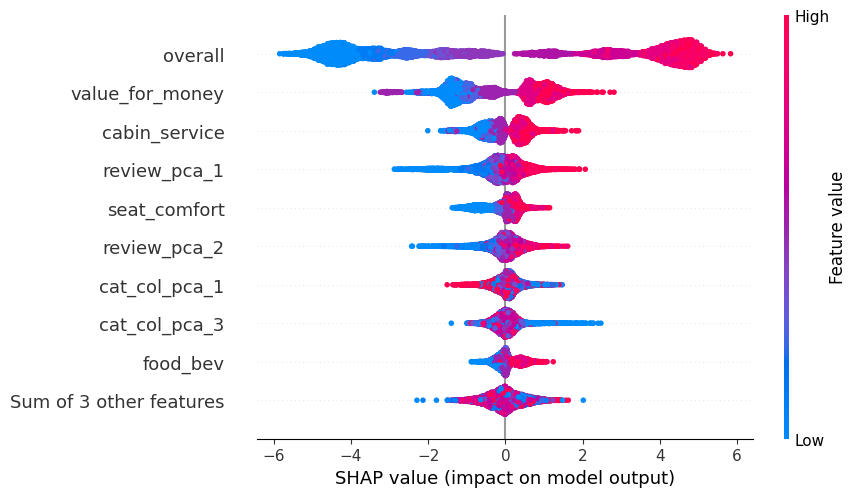

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

This is a **SHAP summary plot**, which is a type of visualization used to interpret the output of SHAP (SHapley Additive exPlanations) values. SHAP values measure the contribution of each feature to the model's prediction.

**Key elements of the plot:**

* **Horizontal axis:** Represents the range of possible SHAP values, which indicate the importance of a feature.
* **Vertical axis:** Represents the individual factors that contribute to the overall score.
* **Dots:** Each dot represents a data point, and its position on the horizontal axis indicates the feature's contribution to the model's prediction for that data point.
* **Color gradient:** The color gradient from blue to red indicates the feature value. Blue dots represent low feature values, while red dots represent high feature values.
* **Violin plots:** The violin plots show the distribution of SHAP values for each feature. The shape of the violin plot indicates the distribution of the feature's impact on the model's prediction.

**Interpretation of the plot:**

* **Feature importance:** The position of the dots on the horizontal axis indicates the importance of the corresponding feature. Features with dots that are further from the center (0) are more important than features with dots that are closer to the center.
* **Feature value impact:** The color of the dots indicates the impact of the feature value on the model's prediction. Red dots indicate that high feature values contribute positively to the prediction, while blue dots indicate that low feature values contribute negatively to the prediction.
* **Feature interaction:** The overlap between the violin plots for different features can indicate feature interactions. If the violin plots for two features overlap, it suggests that the impact of one feature depends on the value of the other feature.

**In summary:**

The SHAP summary plot provides a visual representation of the feature importance and feature value impact in predicting the overall score of a product or service. By examining the position and color of the dots, you can identify the key drivers of the overall score and understand how different feature values contribute to the model's predictions.

# **Conclusion**


###**Conclusion**

  The Models used for this Classsification problem are

 1. Logistic Regression Model
 2. Random Forest Model
 3. XGBoost Classifier Model

* We performed Hyperparameter tuning using Gridsearch CV method for all models To increase accuracy and avoid Overfitting Criteria.

* We have built classifier models using 3 different types of classifiers and all these are able to give accuracy of more than 95%.* We can conclude that XGBoost Classifier gives the best results.

* The most important feature are overall rating that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

* The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

* As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***